###### --------Heart Disease Prediction--------

### Library importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Reviewing the Data

In [2]:
df=pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\Project\8th_sem\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Definition of features

###### age: age in years
###### sex: sex
- 1 = male
- 0 = female

###### cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

###### trestbps: resting blood pressure (in mm Hg on admission to the hospital)
###### chol: serum cholestoral in mg/dl
###### fbs: (fasting blood sugar > 120 mg/dl)
- 1 = true;
- 0 = false

###### restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

###### thalach: maximum heart rate achieved
###### exang: exercise induced angina
- 1 = yes
- 0 = no

###### oldpeak = ST depression induced by exercise relative to rest
###### slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

###### ca: number of major vessels (0-3) colored by flourosopy
###### thal:
- 0 = error (in the original dataset 0 maps to NaN's)
- 1 = fixed defect
- 2 = normal
- 3 = reversable defect

###### target (the lable):
- 0 = no disease,
- 1 = disease
 - ###### Diagnosis of heart disease (angiographic disease status)
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
col=df.columns.tolist()

# Check for null values

In [8]:
print('Number of missing value')
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].isnull().sum()))

Number of missing value
age :- 0
sex :- 0
cp :- 0
trestbps :- 0
chol :- 0
fbs :- 0
restecg :- 0
thalach :- 0
exang :- 0
oldpeak :- 0
slope :- 0
ca :- 0
thal :- 0
target :- 0


# Check for duplicate values

In [9]:
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].duplicated().sum()))

age :- 262
sex :- 301
cp :- 299
trestbps :- 254
chol :- 151
fbs :- 301
restecg :- 300
thalach :- 212
exang :- 301
oldpeak :- 263
slope :- 300
ca :- 298
thal :- 299
target :- 301


# Check for Unique values

In [10]:
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].unique()))
    print('---------------------------')

age :- [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------------------
sex :- [1 0]
---------------------------
cp :- [3 2 1 0]
---------------------------
trestbps :- [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------------------
chol :- [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164

In [11]:
df.corr()[['target']].sort_values(by='target',ascending=False)

,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


# Exploratory Data Analysis

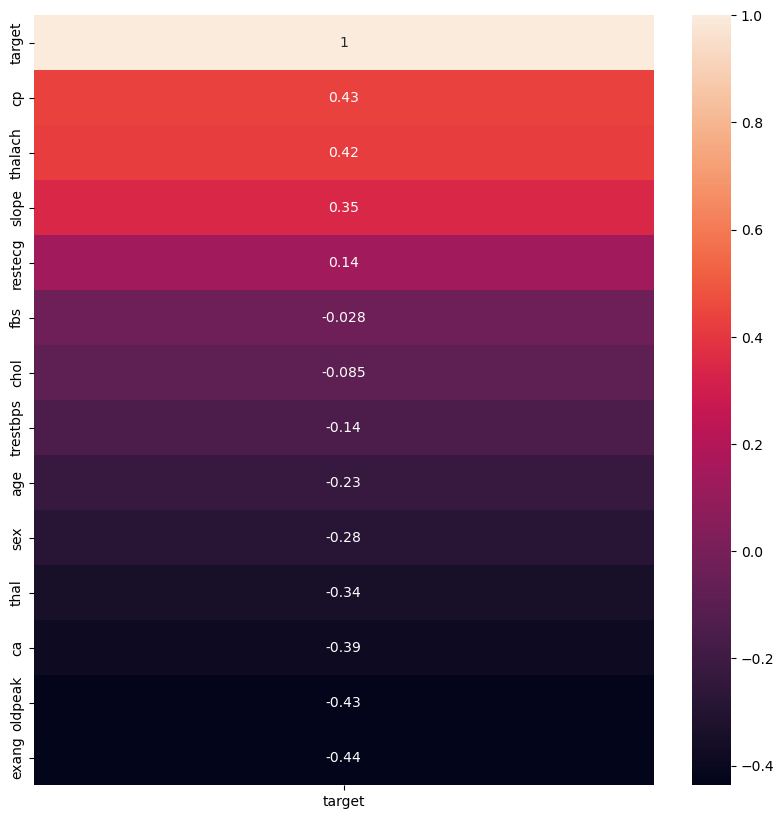

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['target']].sort_values(by='target',ascending=False),annot=True)
plt.show()

In [3]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

# Distribution of Heart Disease

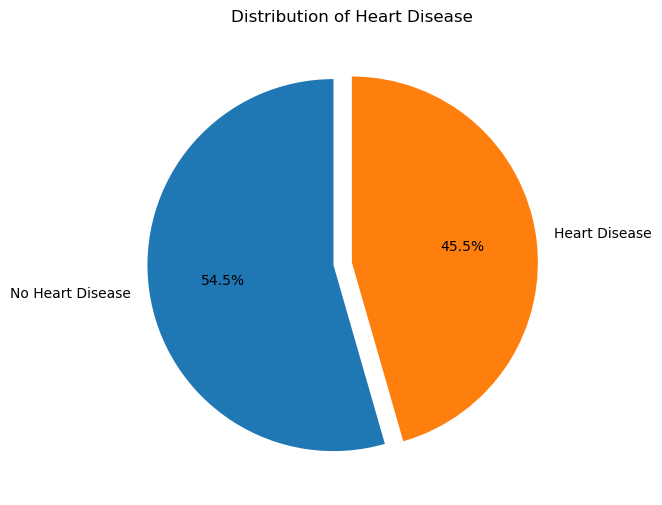

In [15]:
plt.figure(figsize=(6,8))
plt.pie(df['target'].value_counts(),
        labels=['No Heart Disease','Heart Disease'],
        explode=(.1,0),
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of Heart Disease')
plt.show()

In [16]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

 # Outliers Identifying

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

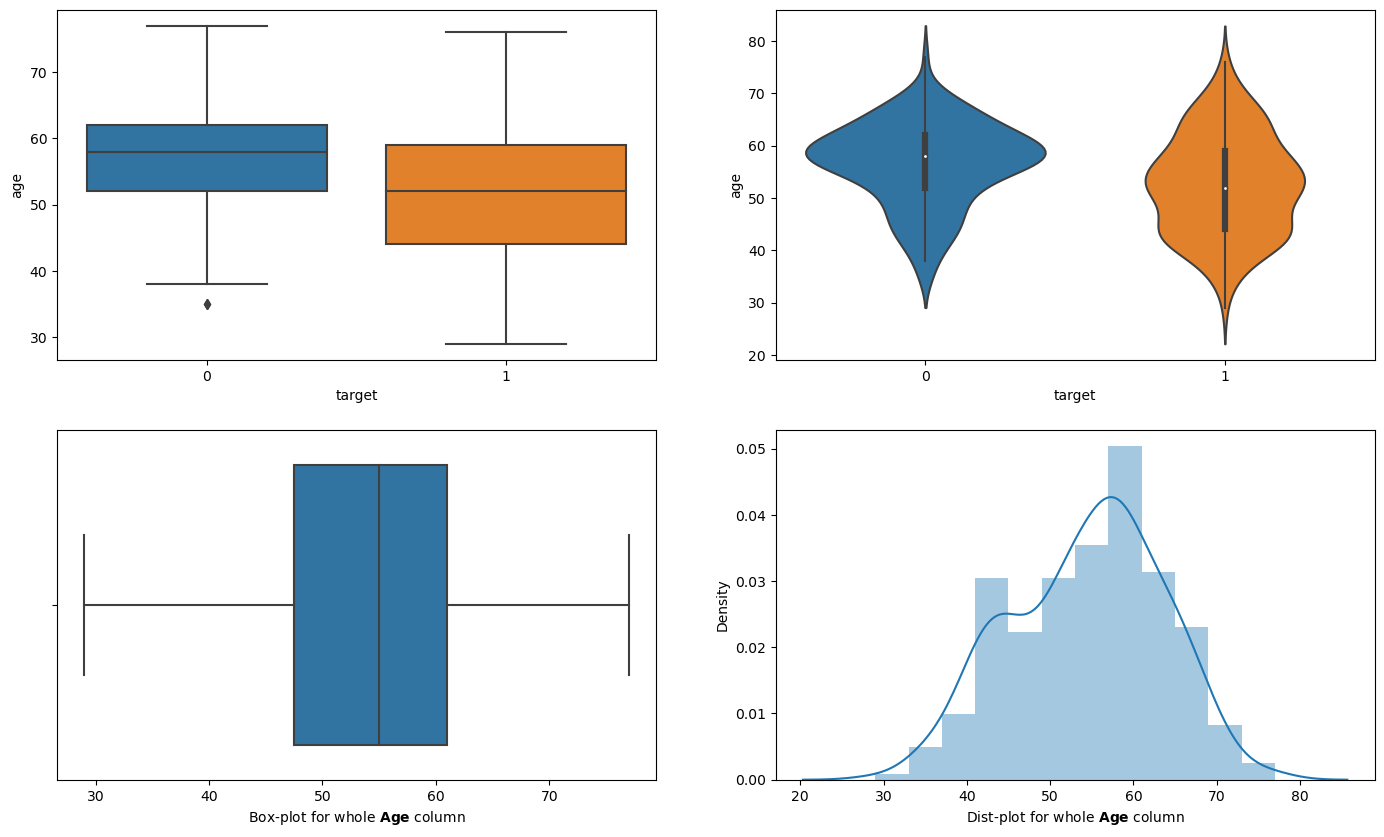

In [17]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','age',data=df,ax=ax[0,0])
sns.violinplot('target','age',data=df,ax=ax[0,1])
sns.boxplot('age',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{Age}$ column')
sns.distplot(df['age'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{Age}$ column')

plt.show()


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

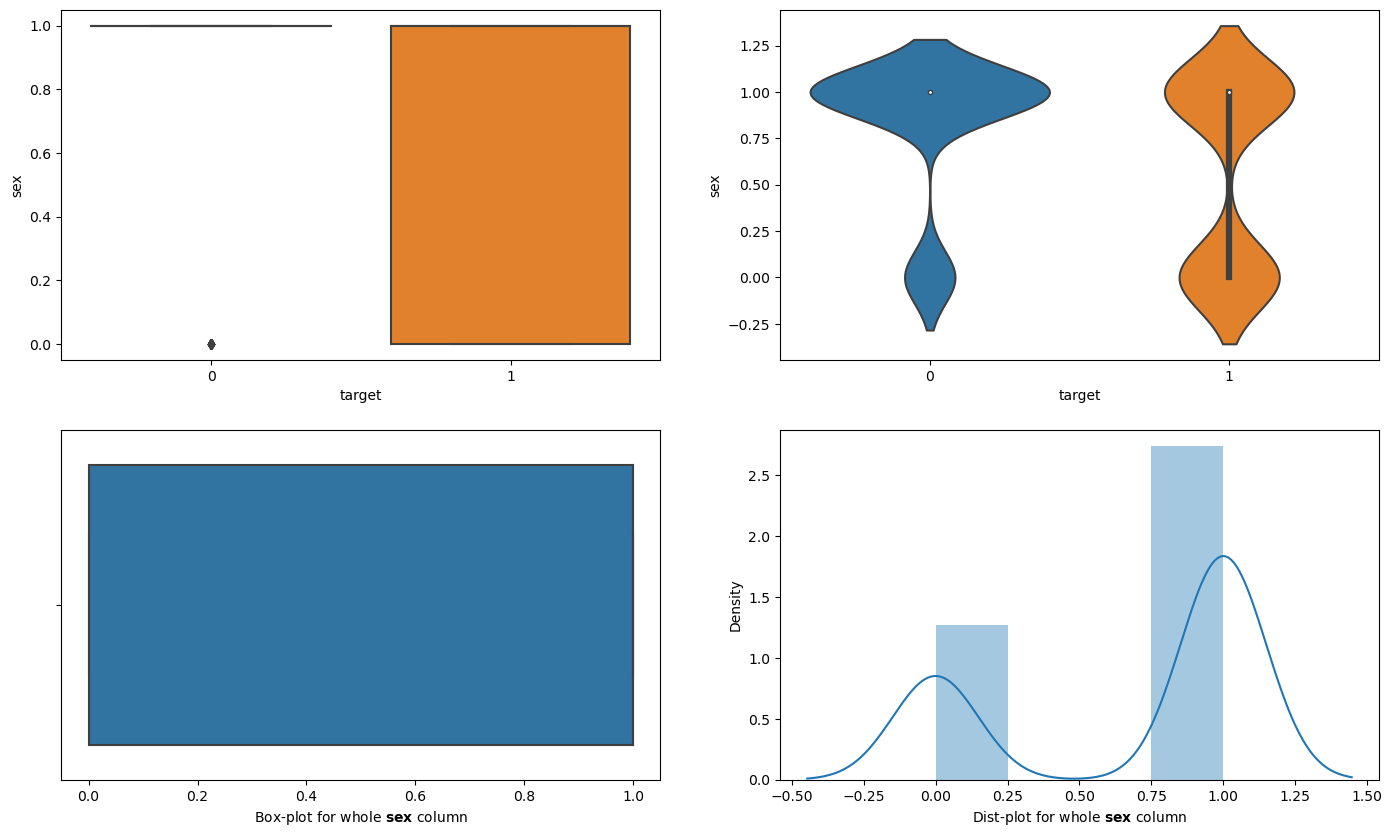

In [18]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','sex',data=df,ax=ax[0,0])
sns.violinplot('target','sex',data=df,ax=ax[0,1])
sns.boxplot('sex',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{sex}$ column')
sns.distplot(df['sex'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{sex}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

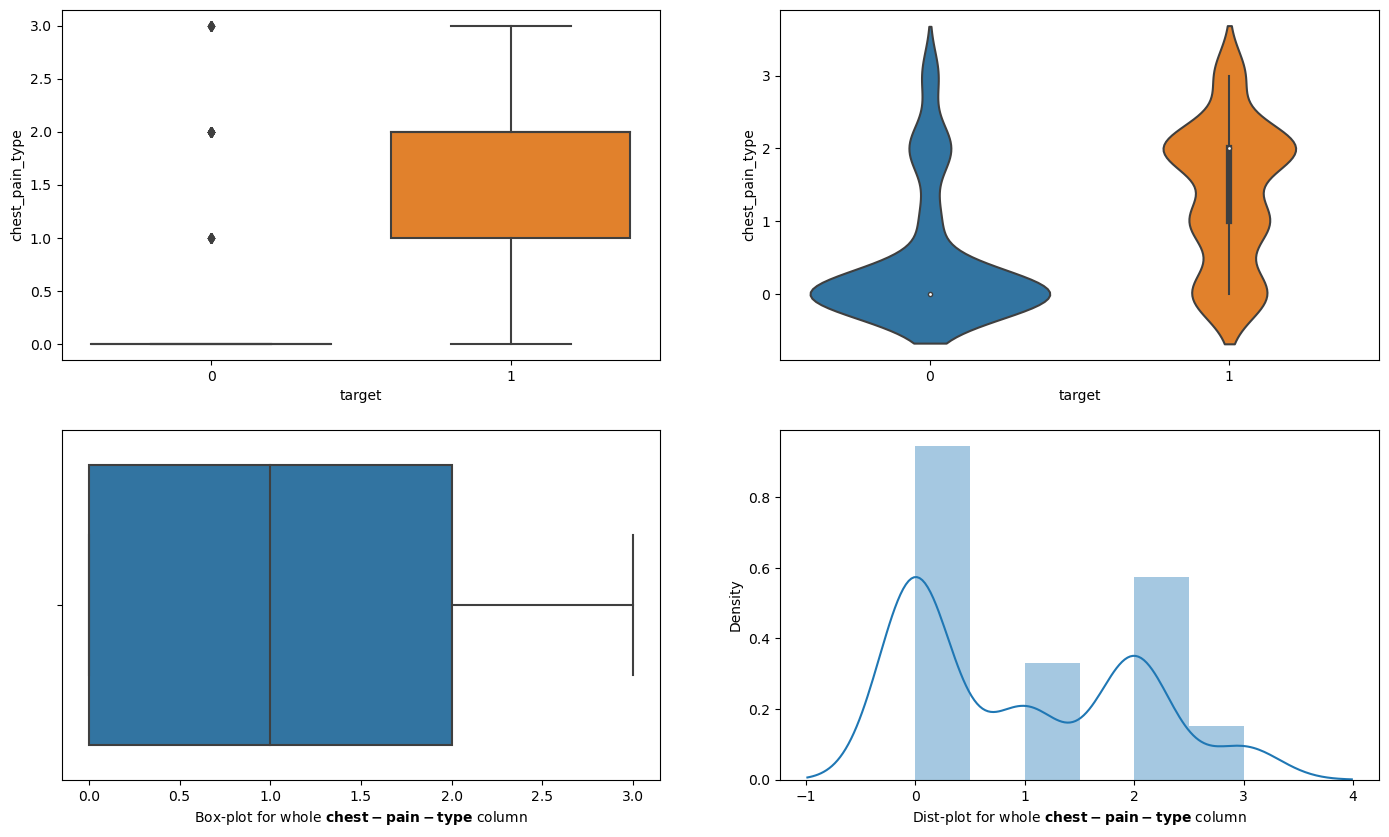

In [19]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','chest_pain_type',data=df,ax=ax[0,0])
sns.violinplot('target','chest_pain_type',data=df,ax=ax[0,1])

sns.boxplot('chest_pain_type',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{chest-pain-type}$ column')
sns.distplot(df['chest_pain_type'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{chest-pain-type}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

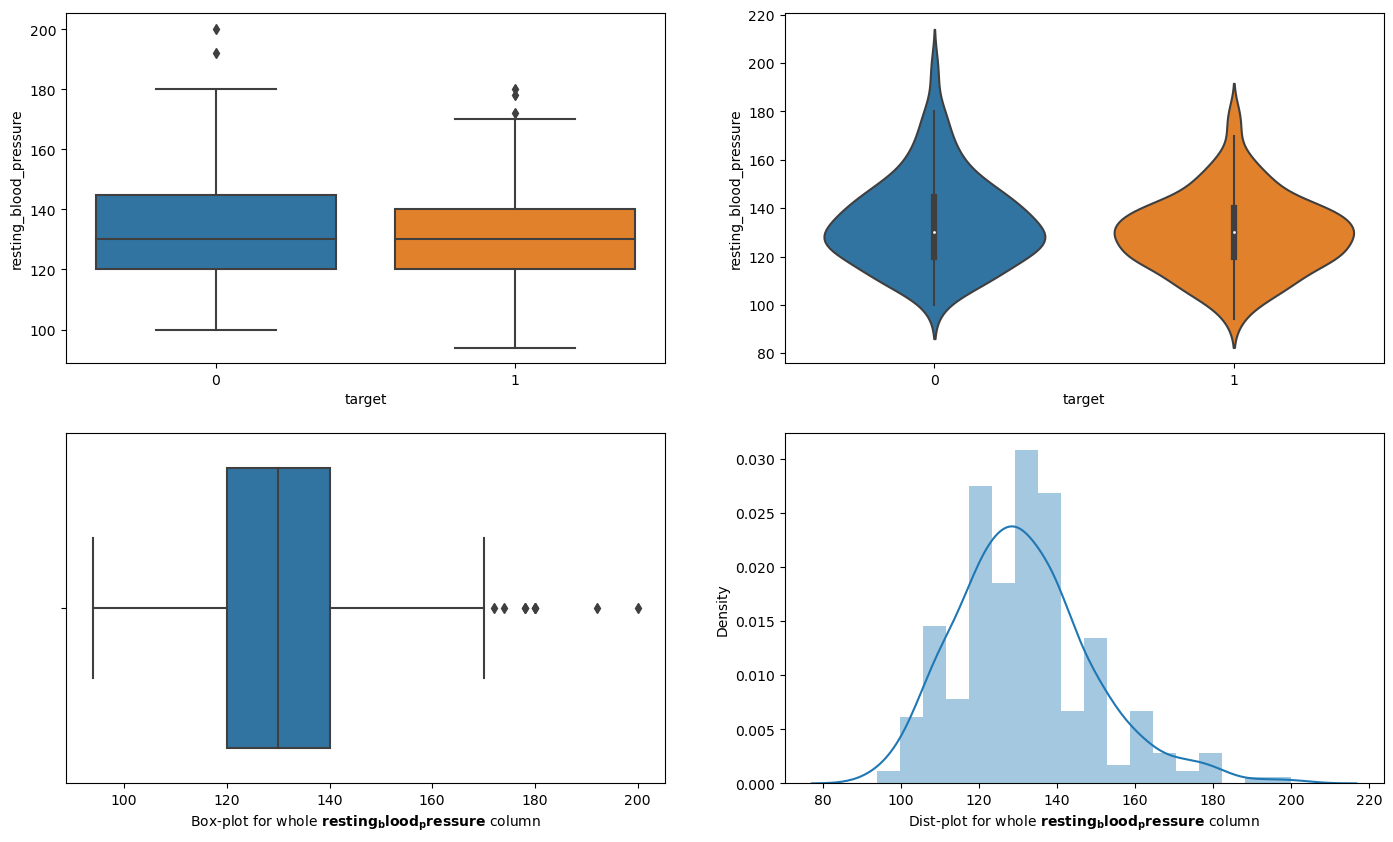

In [20]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','resting_blood_pressure',data=df,ax=ax[0,0])
sns.violinplot('target','resting_blood_pressure',data=df,ax=ax[0,1])
sns.boxplot('resting_blood_pressure',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{resting_blood_pressure}$ column')
sns.distplot(df['resting_blood_pressure'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{resting_blood_pressure}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

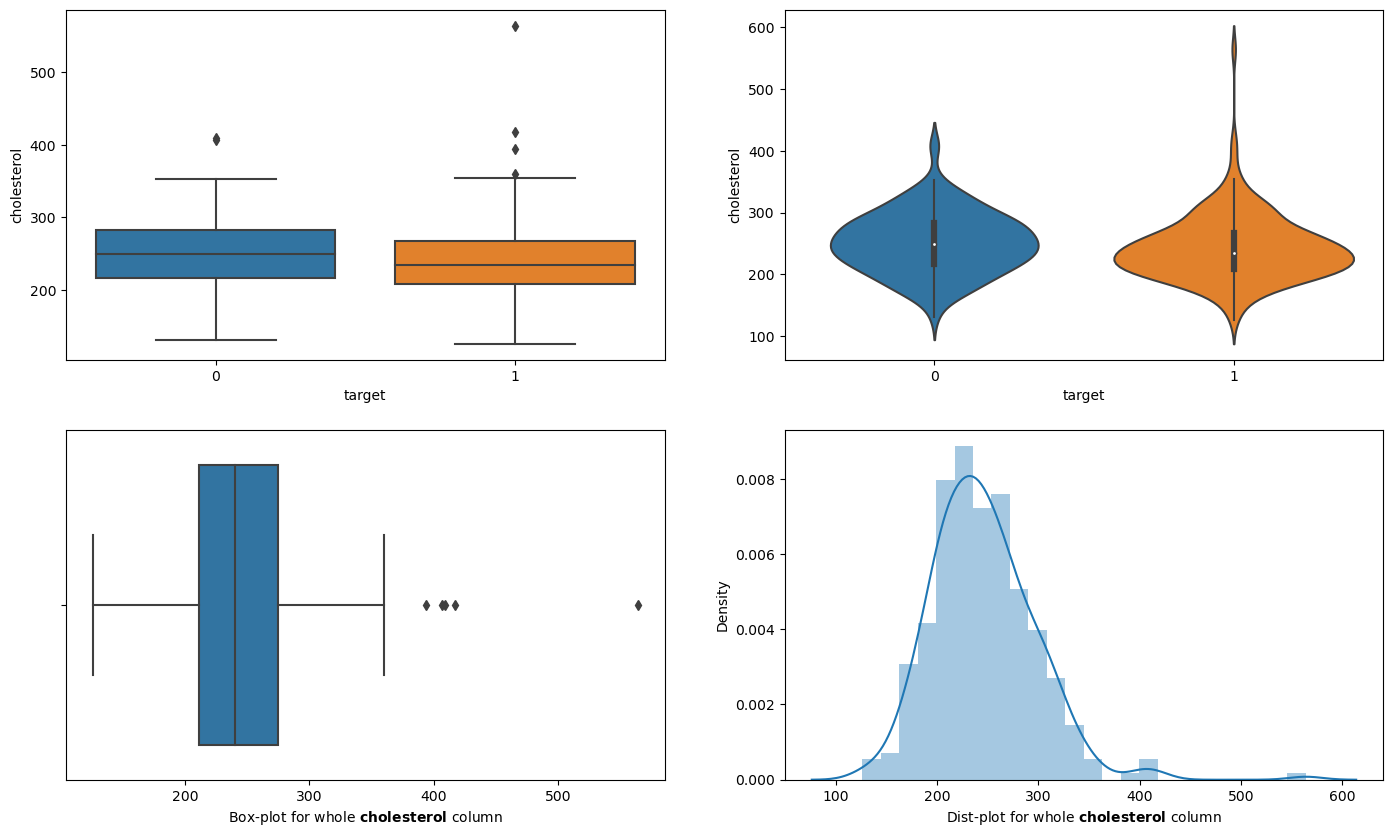

In [21]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','cholesterol',data=df,ax=ax[0,0])
sns.violinplot('target','cholesterol',data=df,ax=ax[0,1])

sns.boxplot('cholesterol',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{cholesterol}$ column')
sns.distplot(df['cholesterol'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{cholesterol}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

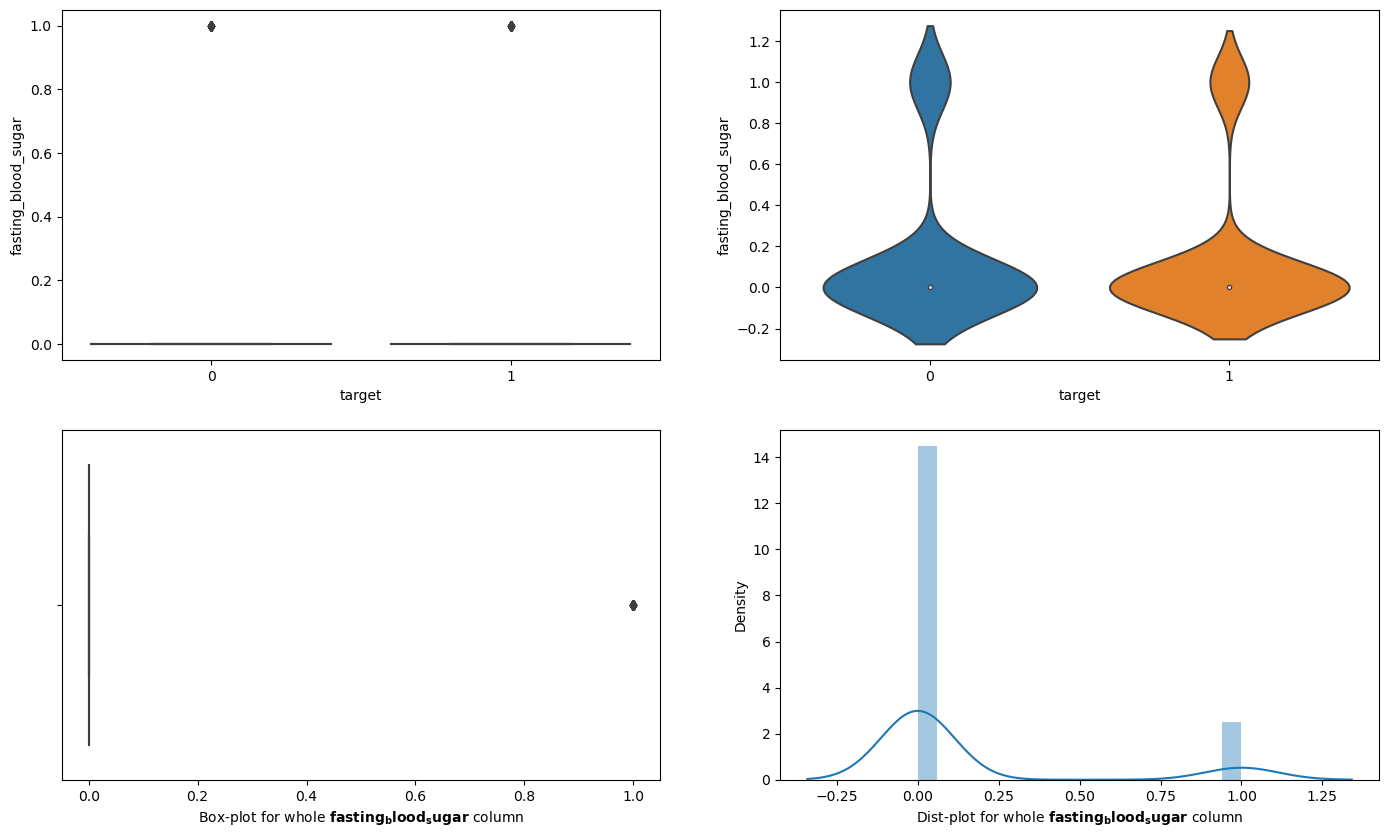

In [22]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','fasting_blood_sugar',data=df,ax=ax[0,0])
sns.violinplot('target','fasting_blood_sugar',data=df,ax=ax[0,1])

sns.boxplot('fasting_blood_sugar',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{fasting_blood_sugar}$ column')
sns.distplot(df['fasting_blood_sugar'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{fasting_blood_sugar}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

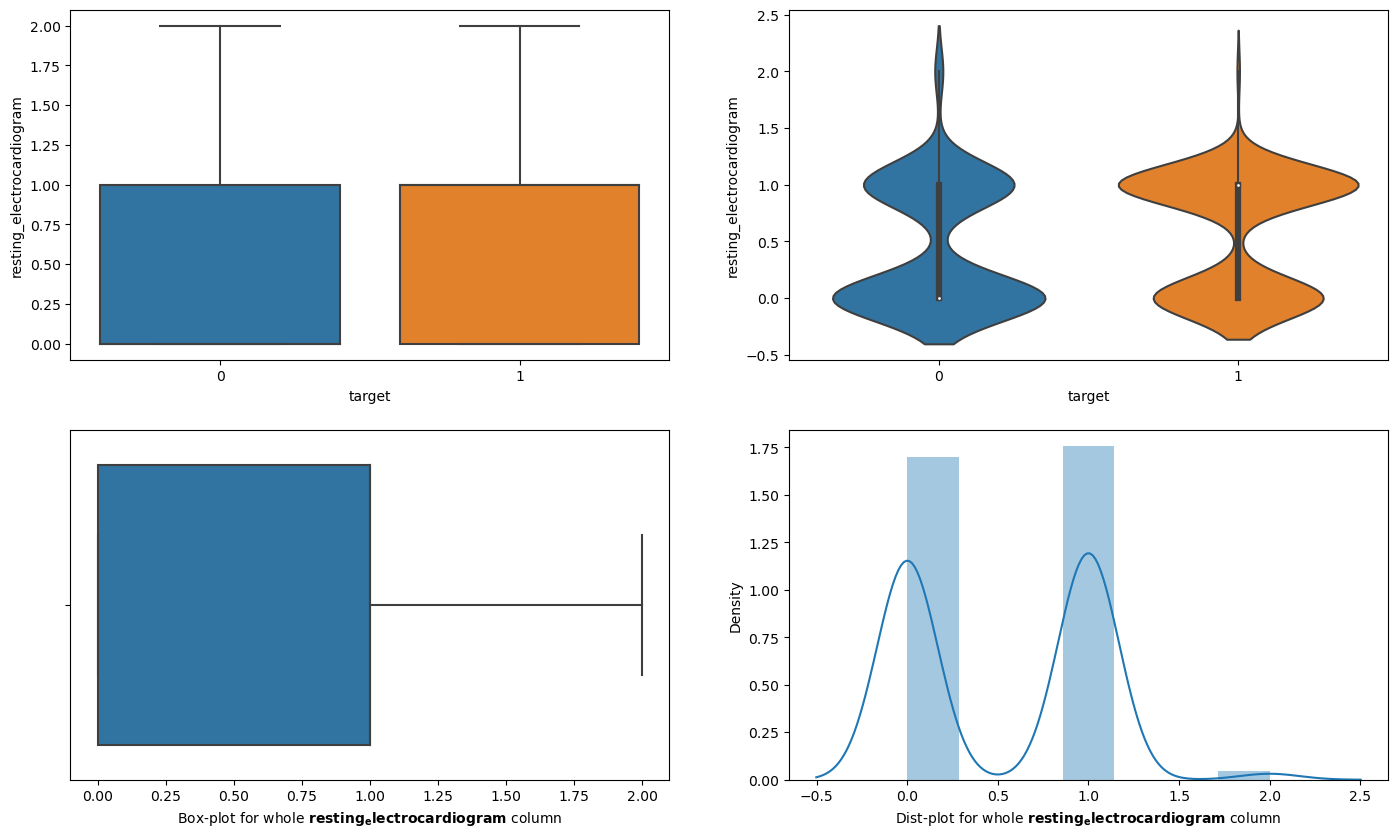

In [23]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','resting_electrocardiogram',data=df,ax=ax[0,0])
sns.violinplot('target','resting_electrocardiogram',data=df,ax=ax[0,1])

sns.boxplot('resting_electrocardiogram',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{resting_electrocardiogram}$ column')
sns.distplot(df['resting_electrocardiogram'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{resting_electrocardiogram}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

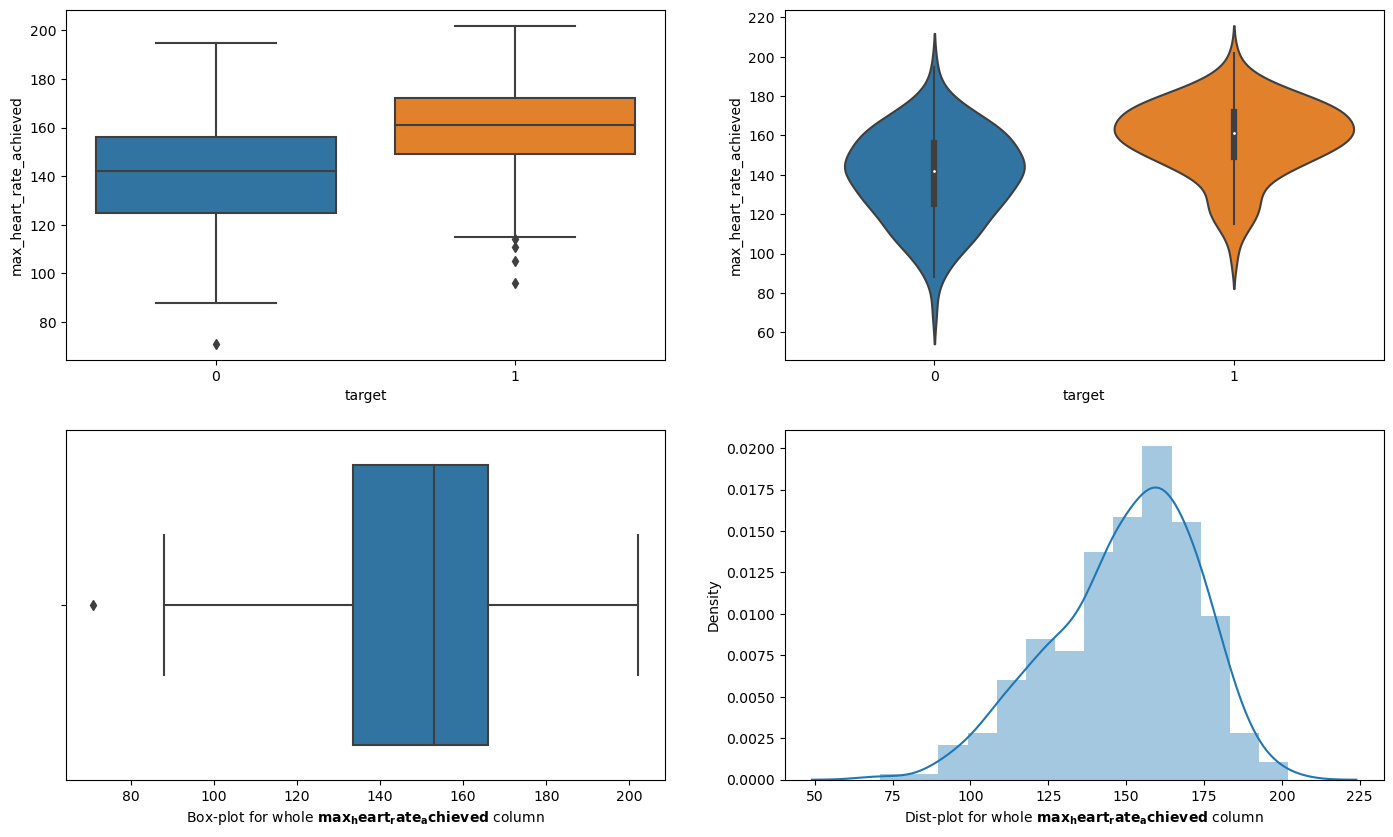

In [24]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','max_heart_rate_achieved',data=df,ax=ax[0,0])
sns.violinplot('target','max_heart_rate_achieved',data=df,ax=ax[0,1])


sns.boxplot('max_heart_rate_achieved',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{max_heart_rate_achieved}$ column')
sns.distplot(df['max_heart_rate_achieved'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{max_heart_rate_achieved}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

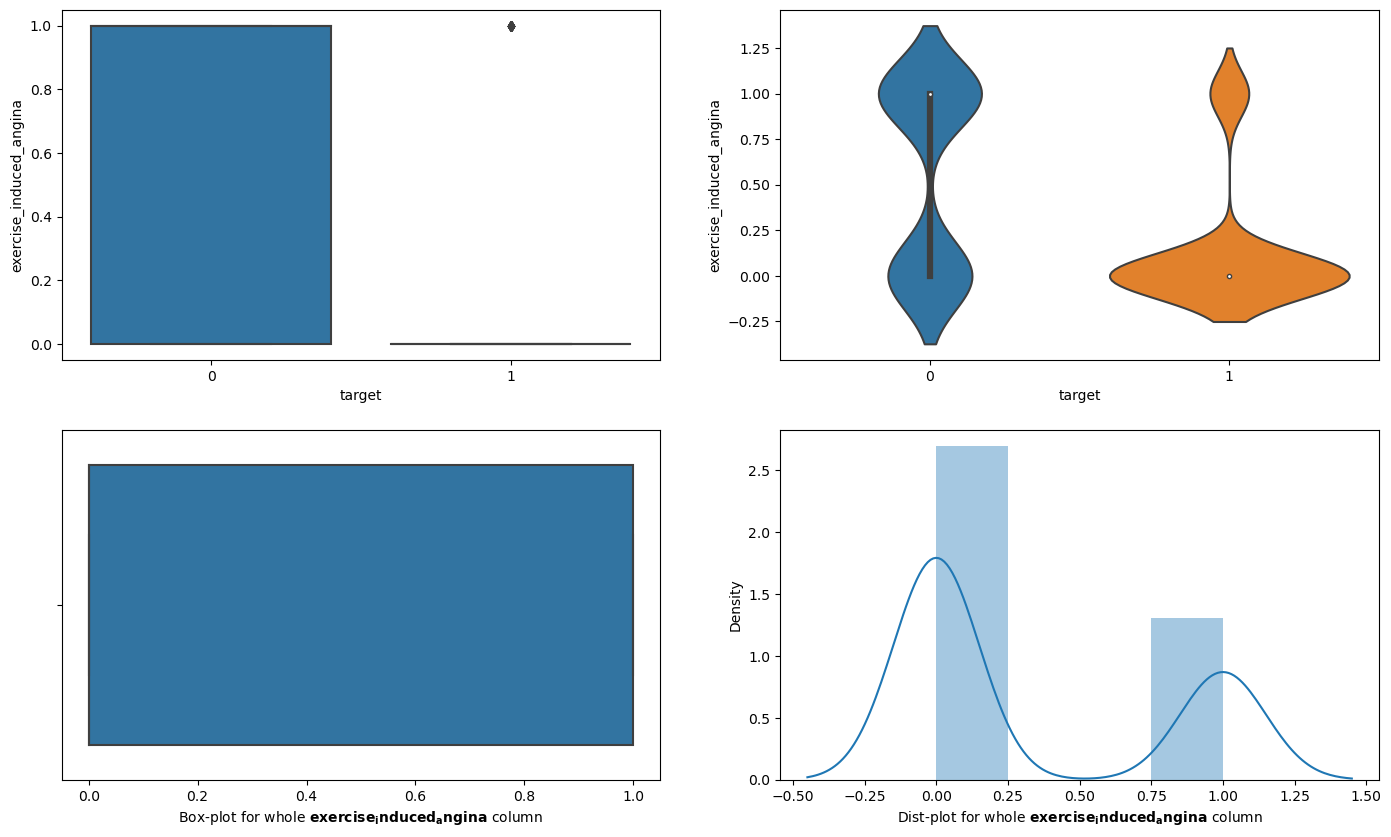

In [25]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','exercise_induced_angina',data=df,ax=ax[0,0])
sns.violinplot('target','exercise_induced_angina',data=df,ax=ax[0,1])

sns.boxplot('exercise_induced_angina',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{exercise_induced_angina}$ column')
sns.distplot(df['exercise_induced_angina'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{exercise_induced_angina}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

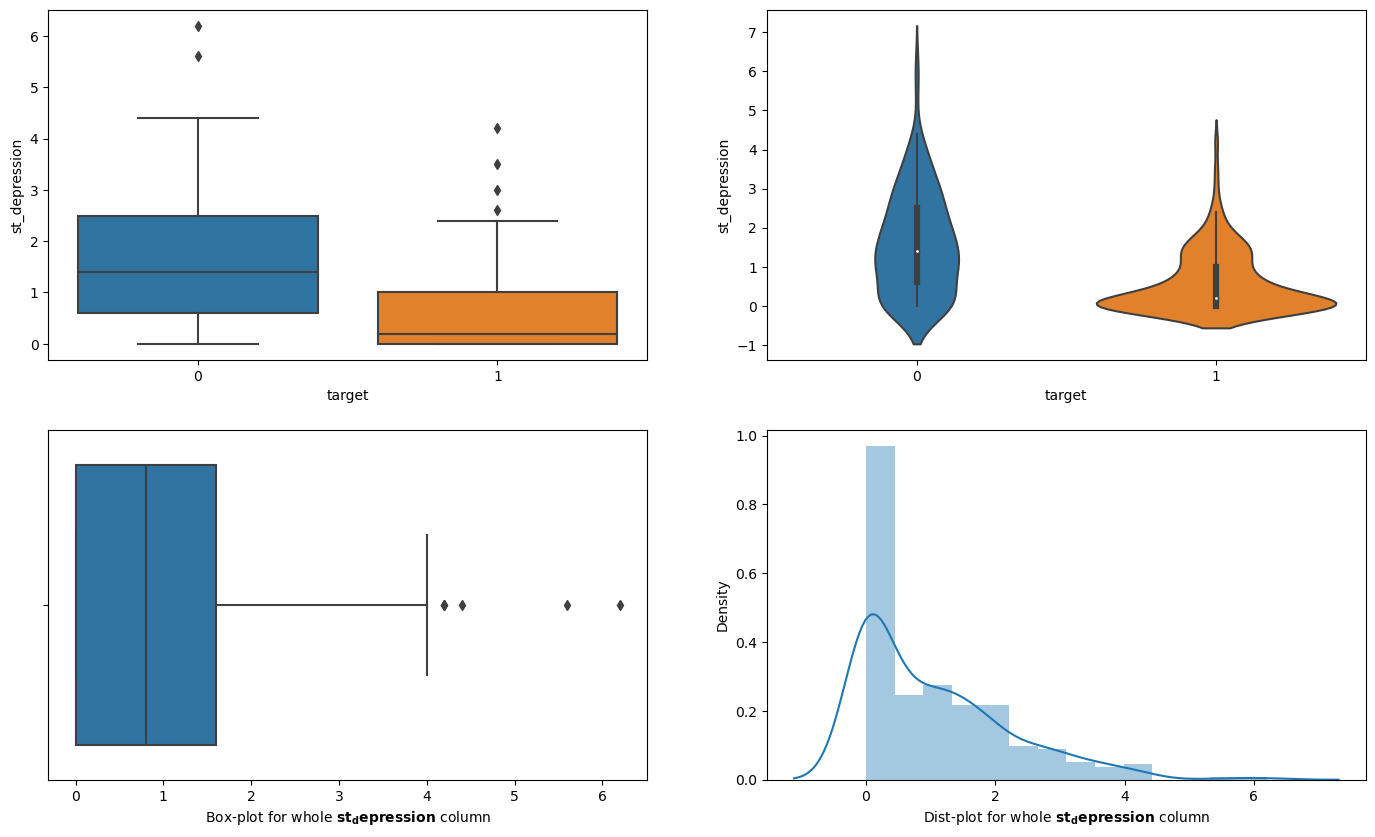

In [26]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','st_depression',data=df,ax=ax[0,0])
sns.violinplot('target','st_depression',data=df,ax=ax[0,1])

sns.boxplot('st_depression',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{st_depression}$ column')
sns.distplot(df['st_depression'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{st_depression}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

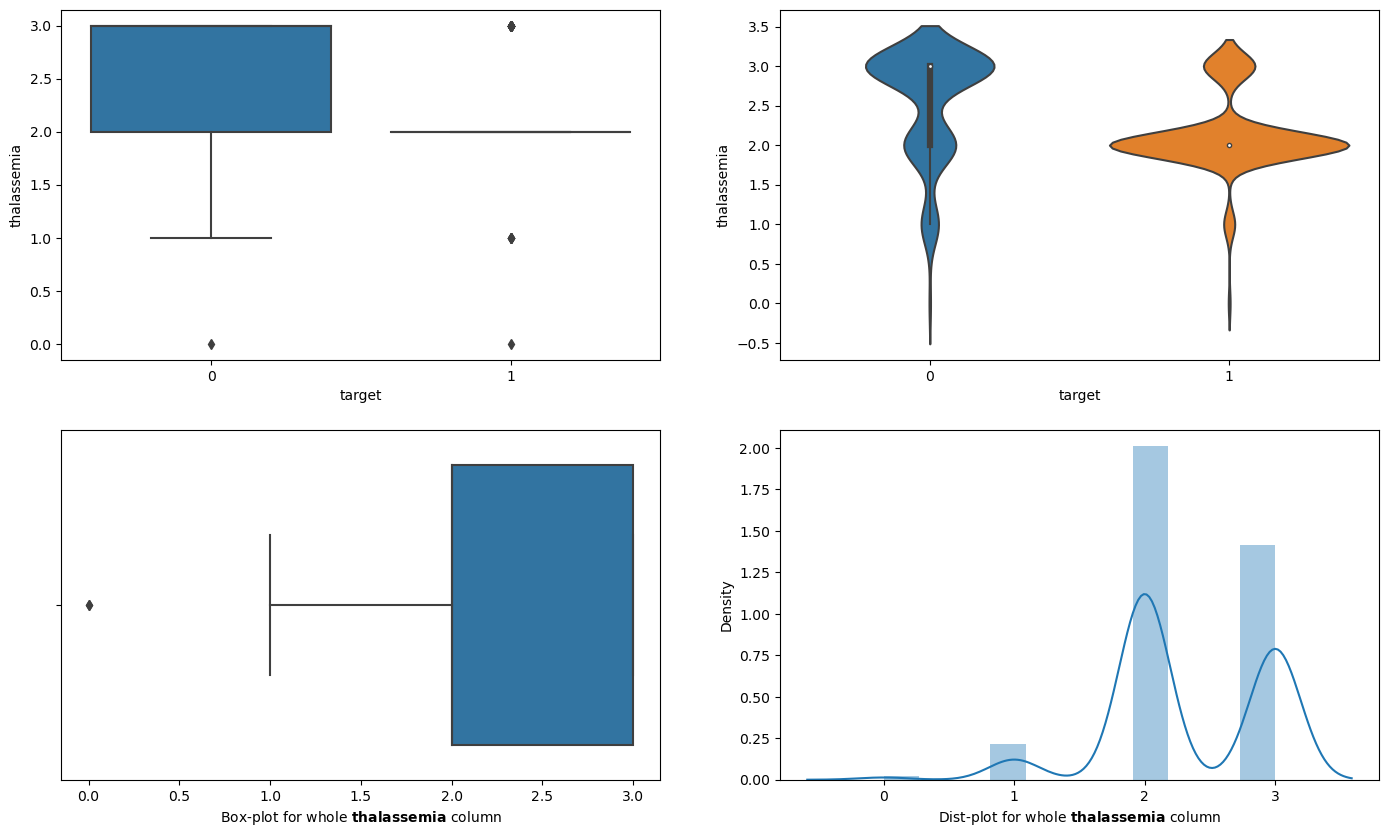

In [27]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','thalassemia',data=df,ax=ax[0,0])
sns.violinplot('target','thalassemia',data=df,ax=ax[0,1])

sns.boxplot('thalassemia',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{thalassemia}$ column')
sns.distplot(df['thalassemia'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{thalassemia}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

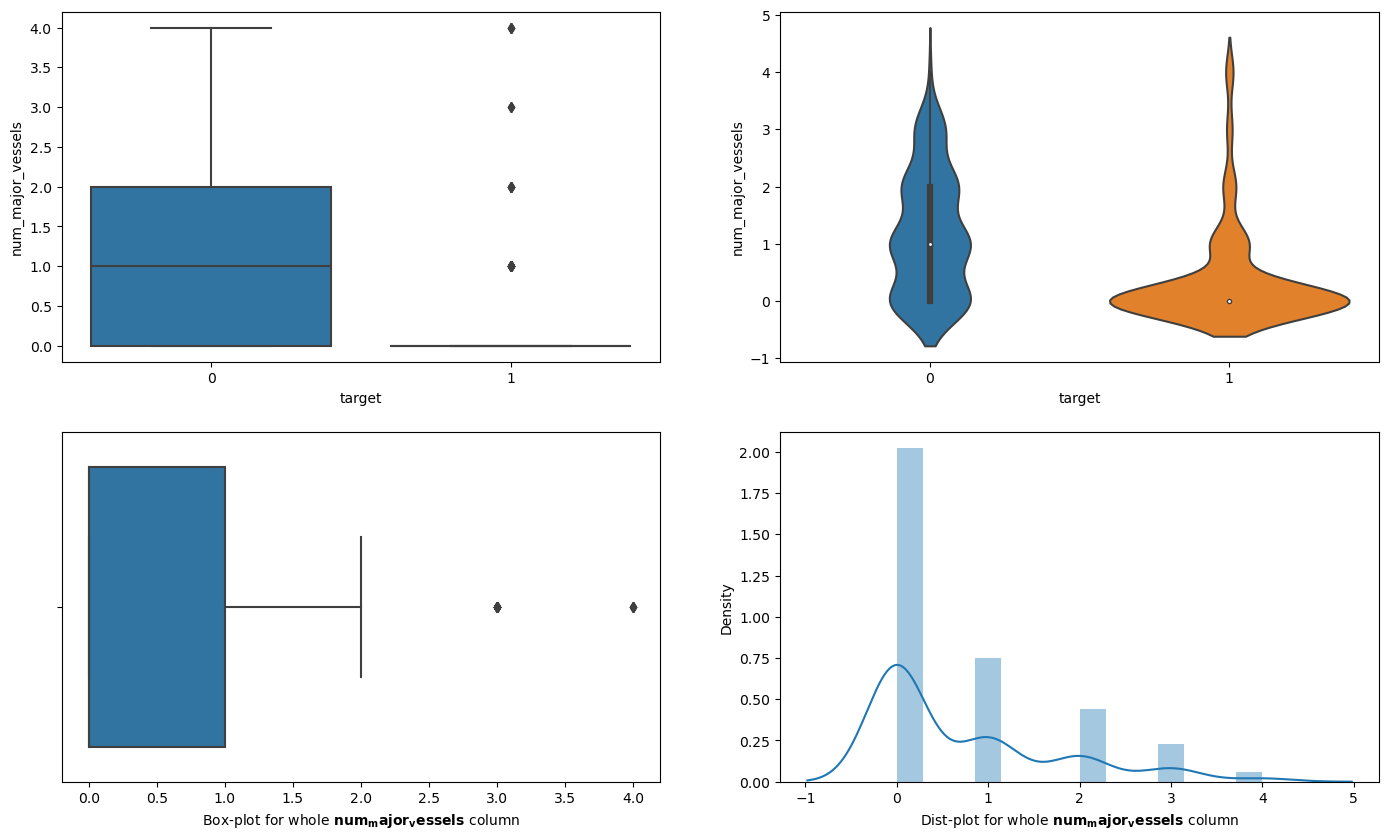

In [28]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','num_major_vessels',data=df,ax=ax[0,0])
sns.violinplot('target','num_major_vessels',data=df,ax=ax[0,1])


sns.boxplot('num_major_vessels',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{num_major_vessels}$ column')
sns.distplot(df['num_major_vessels'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{num_major_vessels}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

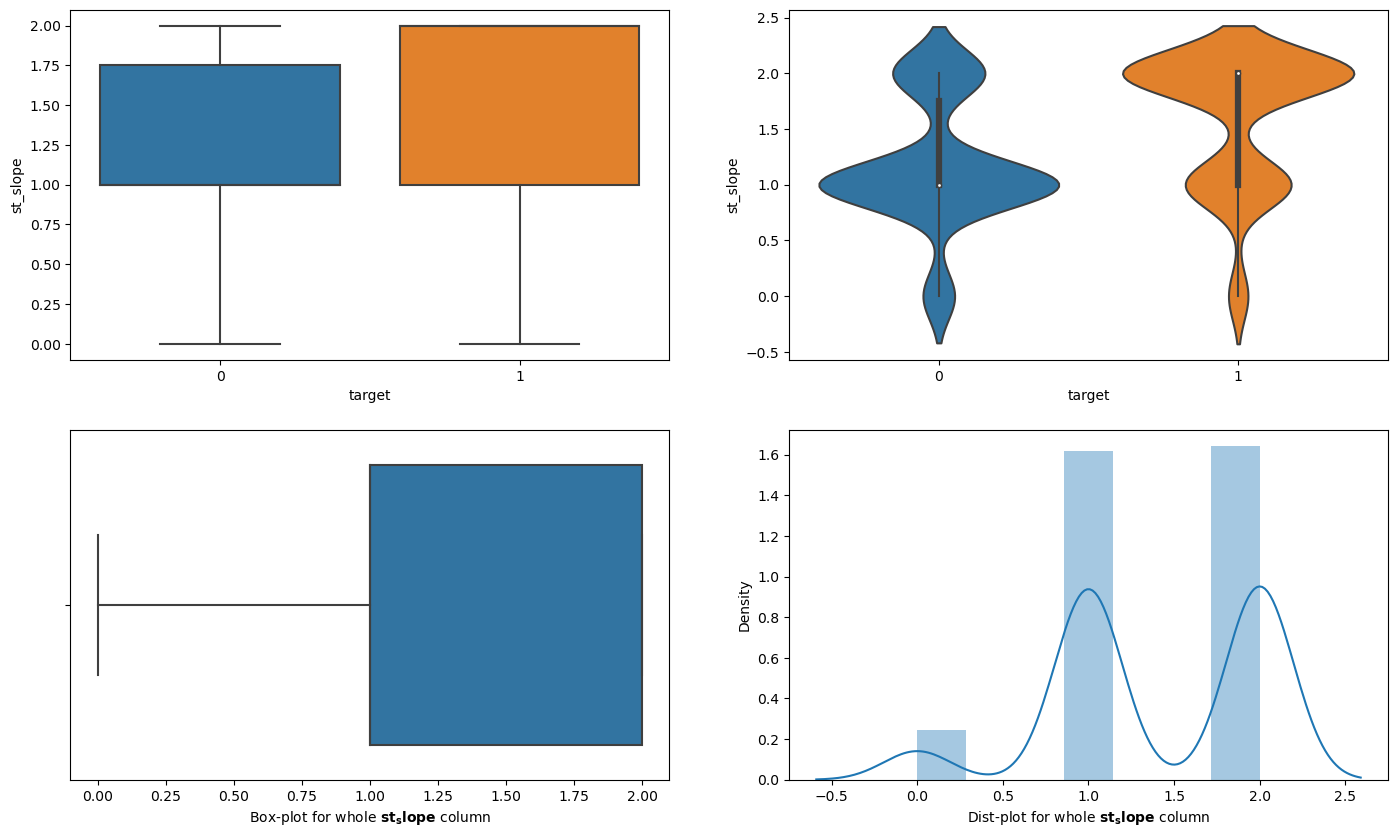

In [29]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('target','st_slope',data=df,ax=ax[0,0])
sns.violinplot('target','st_slope',data=df,ax=ax[0,1])

sns.boxplot('st_slope',data=df,ax=ax[1,0])

ax[1,0].set_xlabel('Box-plot for whole $\mathbf{st_slope}$ column')
sns.distplot(df['st_slope'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{st_slope}$ column')

plt.show()

# Few columns has outliers
### Those are :
 - st_depression
 - max_heart_rate_achieved
 - cholesterol
 - resting_blood_pressure

# Handling the Outliers

In [30]:
# num_major_vessels
quantile_25= df['st_depression'].quantile(0.25)
quantile_75= df['st_depression'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR


In [31]:
df.loc[(df['st_depression']> upper) | (df['st_depression']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [32]:
df['st_depression']= np.where(df['st_depression']> upper,
                             upper,
                             np.where(df['st_depression']<lower,
                                     lower,
                                     df['st_depression']))

In [33]:
df.loc[(df['st_depression']> upper) | (df['st_depression']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target


In [34]:
# max_heart_rate_achieved
quantile_25= df['max_heart_rate_achieved'].quantile(0.25)
quantile_75= df['max_heart_rate_achieved'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR

In [35]:
df.loc[(df['max_heart_rate_achieved']> upper) | (df['max_heart_rate_achieved']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [36]:
df['max_heart_rate_achieved']= np.where(df['max_heart_rate_achieved']> upper,
                             upper,
                             np.where(df['max_heart_rate_achieved']<lower,
                                     lower,
                                     df['max_heart_rate_achieved']))

In [37]:
df.loc[(df['max_heart_rate_achieved']> upper) | (df['max_heart_rate_achieved']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target


In [38]:
# cholesterol
quantile_25= df['cholesterol'].quantile(0.25)
quantile_75= df['cholesterol'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR

In [39]:
df.loc[(df['cholesterol']> upper) | (df['cholesterol']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
28,65,0,2,140,417,1,0,157.0,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160.0,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157.0,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154.0,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150.0,1,1.9,1,2,3,0


In [40]:
df['cholesterol']= np.where(df['cholesterol']> upper,
                             upper,
                             np.where(df['cholesterol']<lower,
                                     lower,
                                     df['cholesterol']))

In [41]:
df.loc[(df['cholesterol']> upper) | (df['cholesterol']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target


In [42]:
# resting_blood_pressure
quantile_25= df['resting_blood_pressure'].quantile(0.25)
quantile_75= df['resting_blood_pressure'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR

In [43]:
df.loc[(df['resting_blood_pressure']> upper) | (df['resting_blood_pressure']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
8,52,1,2,172,199.0,1,1,162.0,0,0.5,2,0,3,1
101,59,1,3,178,270.0,0,0,145.0,0,4.0,0,0,3,1
110,64,0,0,180,325.0,0,1,154.0,1,0.0,2,0,2,1
203,68,1,2,180,274.0,1,0,150.0,1,1.6,1,0,3,0
223,56,0,0,200,288.0,1,0,133.0,1,4.0,0,2,3,0
241,59,0,0,174,249.0,0,1,143.0,1,0.0,1,0,2,0
248,54,1,1,192,283.0,0,0,195.0,0,0.0,2,1,3,0
260,66,0,0,178,228.0,1,1,165.0,1,1.0,1,2,3,0
266,55,0,0,180,327.0,0,2,117.0,1,3.4,1,0,2,0


In [44]:
df['resting_blood_pressure']= np.where(df['resting_blood_pressure']> upper,
                             upper,
                             np.where(df['resting_blood_pressure']<lower,
                                     lower,
                                     df['resting_blood_pressure']))

In [45]:
df.loc[(df['resting_blood_pressure']> upper) | (df['resting_blood_pressure']< lower)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target


##  Visualizating all the columns that had outliers before 

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-p

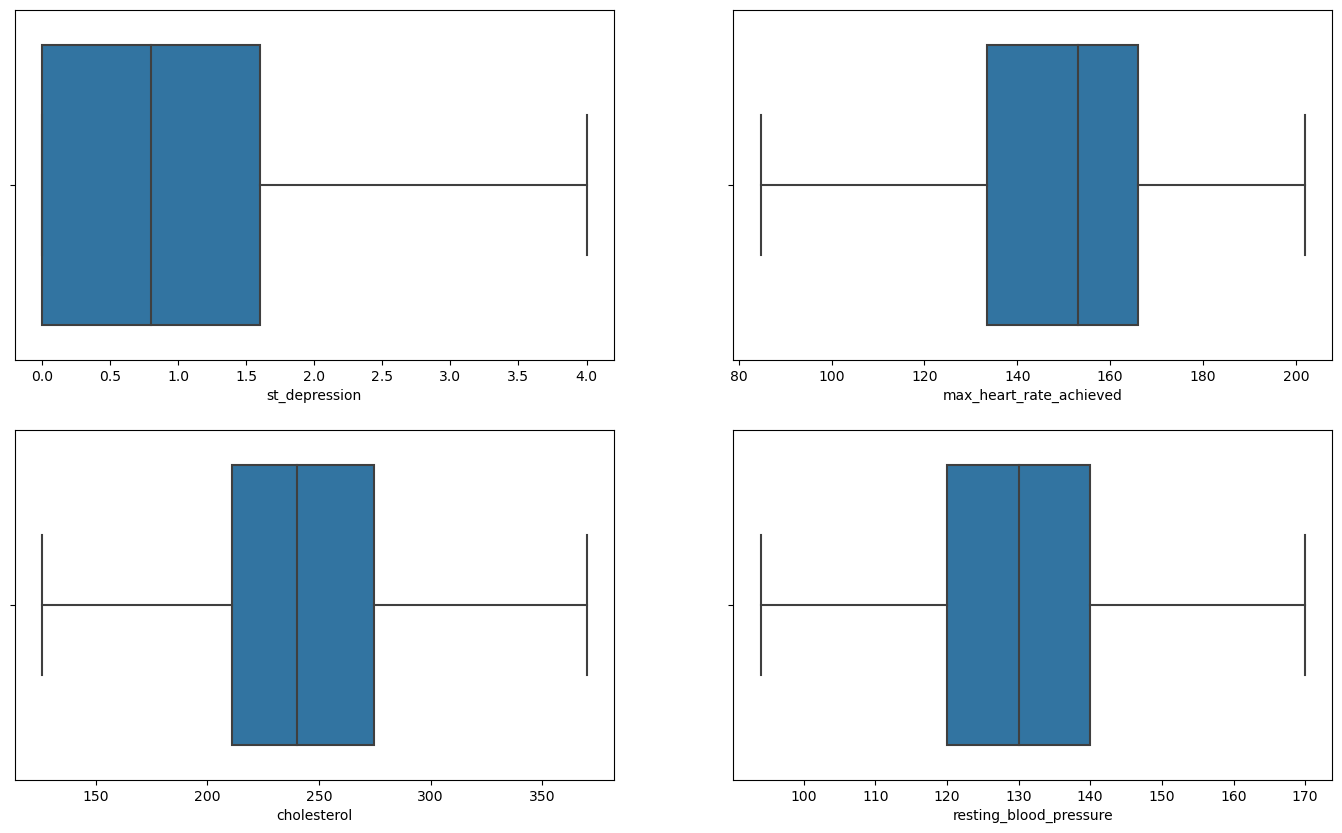

In [46]:
# In plot we can see all the Outlier is removed

fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('st_depression',data=df,ax=ax[0,0])
sns.boxplot('max_heart_rate_achieved',data=df,ax=ax[0,1])
sns.boxplot('cholesterol',data=df,ax=ax[1,0])
sns.boxplot('resting_blood_pressure',data=df,ax=ax[1,1])

plt.show()

# Relation between columns

<AxesSubplot:>

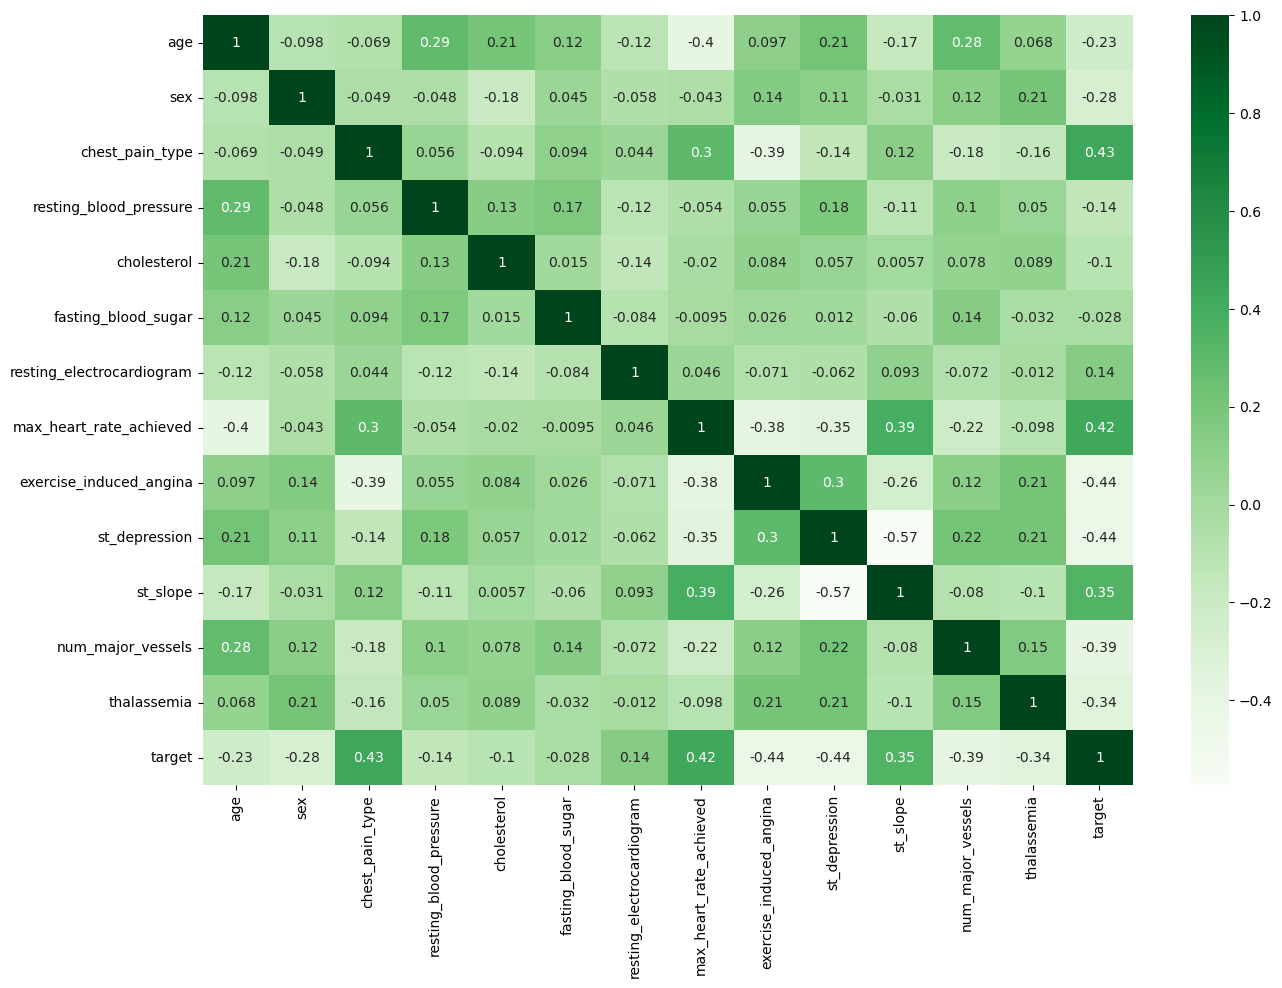

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

<AxesSubplot:>

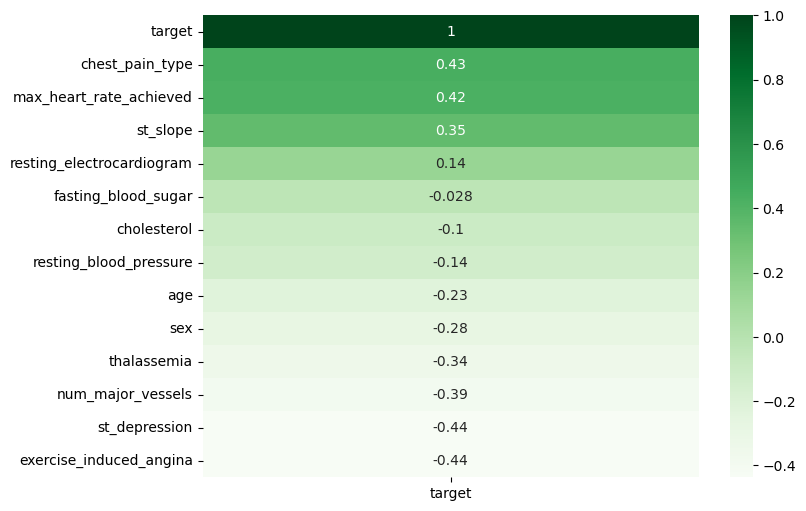

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr()[['target']].sort_values(by='target',ascending=False),annot=True,cmap='Greens')

In [49]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df)

In [50]:
df.corr()[['target']]

,target
age,-0.225439
sex,-0.280937
chest_pain_type,0.433798
resting_blood_pressure,-0.138621
cholesterol,-0.103987
fasting_blood_sugar,-0.028046
resting_electrocardiogram,0.137230
max_heart_rate_achieved,0.422210
exercise_induced_angina,-0.436757
st_depression,-0.436680


In [51]:
dff=df.copy(deep=True)

In [4]:
df.to_csv('heart_disease.csv')

In [52]:
dff

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='Density'>

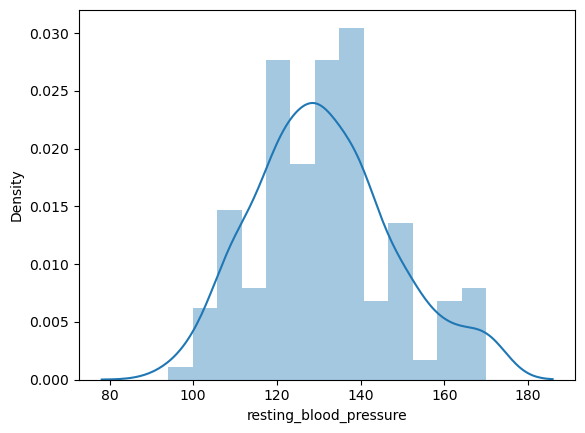

In [53]:
sns.distplot(dff['resting_blood_pressure'])

In [54]:
df.loc[np.where((df['resting_blood_pressure']<120) & (df['target']==1))].shape

(37, 14)

In [55]:
df.loc[np.where((df['resting_blood_pressure']<120))].shape

(60, 14)

# Doing OrdinaryEncoding manually

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='Count'>

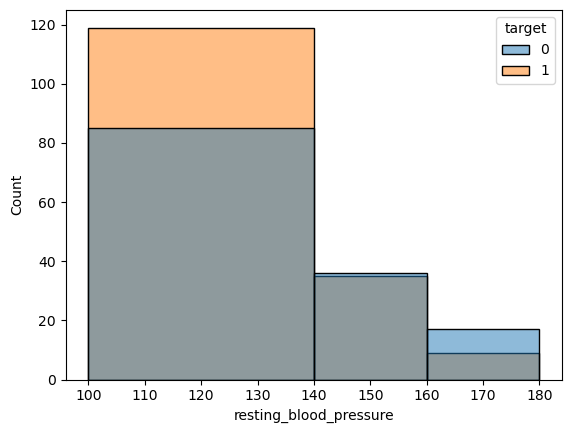

In [56]:
sns.histplot(x=df['resting_blood_pressure'],bins=[100,140,160,180], hue=df['target'])

In [57]:
dff['resting_blood_pressure']= np.where(df['resting_blood_pressure']<140,
                                      2,
                                      np.where(df['resting_blood_pressure']<160,
                                              1,0))

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


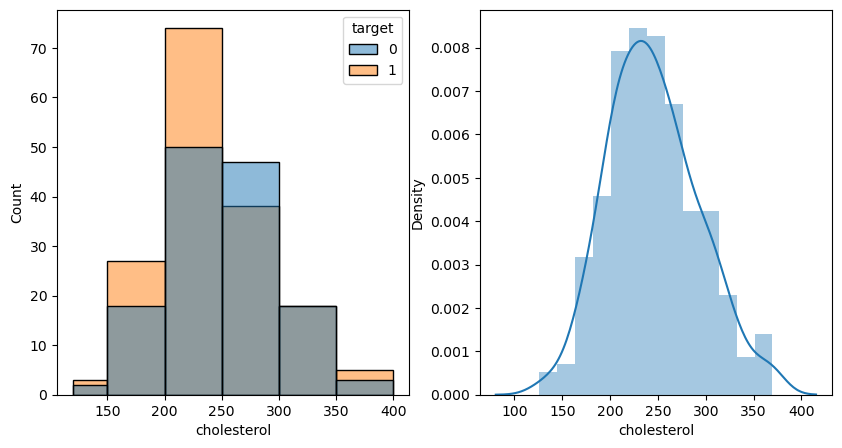

In [58]:
fig,ax= plt.subplots(1,2,figsize=(10,5))
sns.histplot(x=df['cholesterol'],bins=[120,150,200,250,300,350,400], hue=df['target'],ax=ax[0])
sns.distplot(df['cholesterol'],ax=ax[1])
plt.show()

In [59]:
dff['cholesterol']= np.where(df['cholesterol']<252,
                                      1,0)

In [60]:
dff

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,1,1,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,2,1,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,2,1,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,2,1,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,2,0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,1,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,2,0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,1,1,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,2,1,0,1,115.0,1,1.2,1,1,3,0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


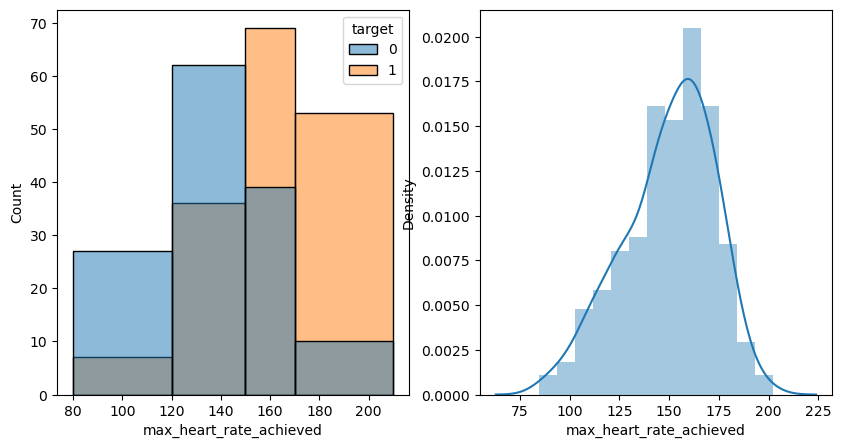

In [61]:
fig,ax= plt.subplots(1,2,figsize=(10,5))
sns.histplot(x=df['max_heart_rate_achieved'],bins=[80,120,150,170,210], hue=df['target'],ax=ax[0])
sns.distplot(df['max_heart_rate_achieved'],ax=ax[1])
plt.show()

In [62]:
dff['max_heart_rate_achieved']= np.where(df['max_heart_rate_achieved']<120,
                                      0,
                                      np.where(df['max_heart_rate_achieved']<150,
                                              1,
                                              np.where(df['max_heart_rate_achieved']<170,
                                                      2,3)))

In [63]:
dff

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,1,1,1,0,2,0,2.3,0,0,1,1
1,37,1,2,2,1,0,1,3,0,3.5,0,0,2,1
2,41,0,1,2,1,0,0,3,0,1.4,2,0,2,1
3,56,1,1,2,1,0,1,3,0,0.8,2,0,2,1
4,57,0,0,2,0,0,1,2,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,1,0,1,1,1,0.2,1,0,3,0
299,45,1,3,2,0,0,1,1,0,1.2,1,0,3,0
300,68,1,0,1,1,1,1,1,0,3.4,1,2,3,0
301,57,1,0,2,1,0,1,0,1,1.2,1,1,3,0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


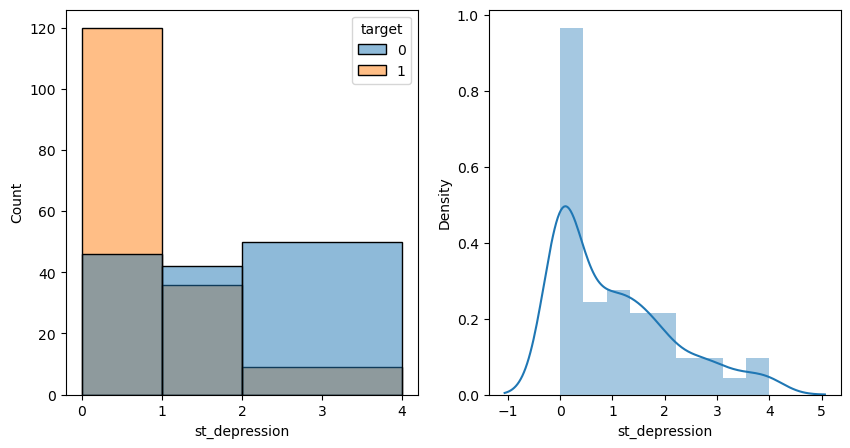

In [64]:
fig,ax= plt.subplots(1,2,figsize=(10,5))
sns.histplot(x=df['st_depression'],bins=[0,1,2,4], hue=df['target'],ax=ax[0])
sns.distplot(df['st_depression'],ax=ax[1])
plt.show()

In [65]:
dff['st_depression']= np.where(df['st_depression']<1,
                                      2,
                                      np.where(df['max_heart_rate_achieved']<2,
                                              1,0))

In [66]:
dff

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,1,1,1,0,2,0,0,0,0,1,1
1,37,1,2,2,1,0,1,3,0,0,0,0,2,1
2,41,0,1,2,1,0,0,3,0,0,2,0,2,1
3,56,1,1,2,1,0,1,3,0,2,2,0,2,1
4,57,0,0,2,0,0,1,2,1,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,1,0,1,1,1,2,1,0,3,0
299,45,1,3,2,0,0,1,1,0,0,1,0,3,0
300,68,1,0,1,1,1,1,1,0,0,1,2,3,0
301,57,1,0,2,1,0,1,0,1,0,1,1,3,0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


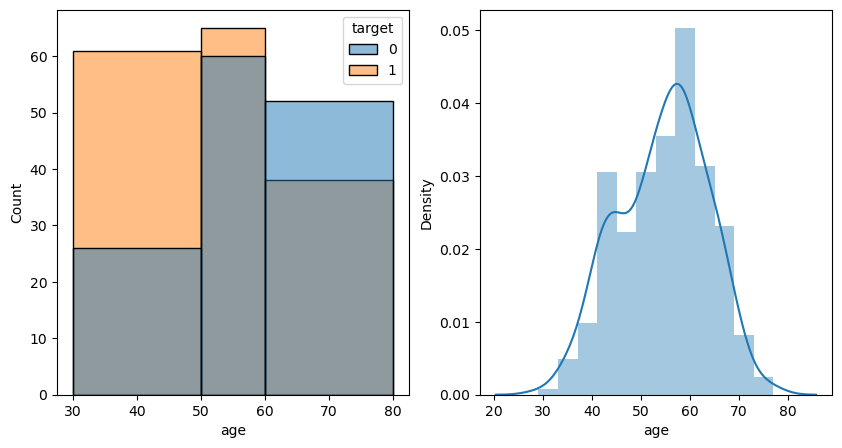

In [67]:
fig,ax= plt.subplots(1,2,figsize=(10,5))
sns.histplot(x=df['age'],bins=[30,50,60,80], hue=df['target'],ax=ax[0])
sns.distplot(df['age'],ax=ax[1])
plt.show()

In [68]:
dff['age']= np.where(df['age']<50,
                     2,
                     np.where(df['age']<60,
                     1,0))

In [69]:
dff

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0,1,3,1,1,1,0,2,0,0,0,0,1,1
1,2,1,2,2,1,0,1,3,0,0,0,0,2,1
2,2,0,1,2,1,0,0,3,0,0,2,0,2,1
3,1,1,1,2,1,0,1,3,0,2,2,0,2,1
4,1,0,0,2,0,0,1,2,1,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,1,1,0,1,1,1,2,1,0,3,0
299,2,1,3,2,0,0,1,1,0,0,1,0,3,0
300,0,1,0,1,1,1,1,1,0,0,1,2,3,0
301,1,1,0,2,1,0,1,0,1,0,1,1,3,0


# Importing necessary Algorithm and Library

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [71]:
X=dff.drop(columns='target')
y=dff['target']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [74]:
lrg=LogisticRegression()
sgdc=SGDClassifier()
sv=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
sc=StackingClassifier(estimators=dtc)
xgc=xgb.XGBClassifier()
lgc=lgb.LGBMClassifier()
cat=cb.CatBoostClassifier()

In [75]:
all_model={'lrg':lrg,
         'sgdc':sgdc,
         'sv':sv,
         'knn':knn,
         'gnb':gnb,
         'mnb':mnb,
         'dtc':dtc,
         'rfc':rfc,
         'abc':abc,
         'bc':bc,
         'gbc':gbc,
         'xgc':xgc,
         'lgc':lgc,
         'cat':cat
        }

In [76]:
def traning(X,y):
    store=[]
    for key,model in all_model.items():
        print(key)
        try:
            score=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
            store.append(score)
            print(score)
        except:
            score=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='r2').mean()
            store.append(score)
            print(score)
        print('-----------------------------------------')
    arr.append(store)
#     print(arr)
    
    

# Feature selection

In [78]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2

================1=================
lrg
0.7356989247311828
-----------------------------------------
sgdc
0.5235483870967743
-----------------------------------------
sv
0.7356989247311828
-----------------------------------------
knn
0.5944086021505376
-----------------------------------------
gnb
0.6599999999999999
-----------------------------------------
mnb
0.5445161290322581
-----------------------------------------
dtc
0.7356989247311828
-----------------------------------------
rfc
0.7356989247311828
-----------------------------------------
abc
0.7456989247311828
-----------------------------------------
bc
0.7356989247311828
-----------------------------------------
gbc
0.7456989247311828
-----------------------------------------
xgc
0.7356989247311828
-----------------------------------------
================2=================
lrg
0.7455913978494624
-----------------------------------------
sgdc
0.7031182795698924
-----------------------------------------
sv
0.735698924731182

0.8116129032258064
-----------------------------------------
mnb
0.8216129032258065
-----------------------------------------
dtc
0.778279569892473
-----------------------------------------
rfc
0.844516129032258
-----------------------------------------
abc
0.8278494623655914
-----------------------------------------
bc
0.7887096774193548
-----------------------------------------
gbc
0.8116129032258064
-----------------------------------------
xgc
0.8116129032258064
-----------------------------------------
================12=================
lrg
0.8212903225806452
-----------------------------------------
sgdc
0.6668817204301075
-----------------------------------------
sv
0.8281720430107526
-----------------------------------------
knn
0.8149462365591399
-----------------------------------------
gnb
0.7986021505376344
-----------------------------------------
mnb
0.8182795698924732
-----------------------------------------
dtc
0.7819354838709678
--------------------------------------

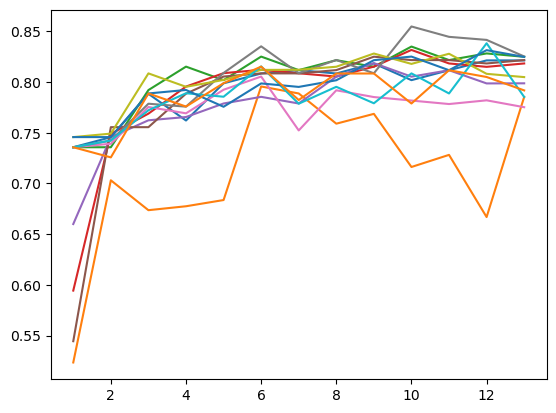

In [79]:
arr=[]
for i in range(1,14):
    print(f"================{i}=================")
    feature1=SelectKBest(chi2,k=i).fit(X,y)
    xx_train=feature1.transform(X)
    traning(xx_train,y)
    
plt.figure()
plt.plot(range(1, len(arr) + 1), arr)
plt.show()

### By using  SelectKBest and chi2 function we find
 - top 8 feature gives - 83.8%  accuracy (random forest)
 - top 10 feature gives - 83.8% accuracy (random forest)
 - top 13(all) feature gives - 84.1% accuracy (random forest) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


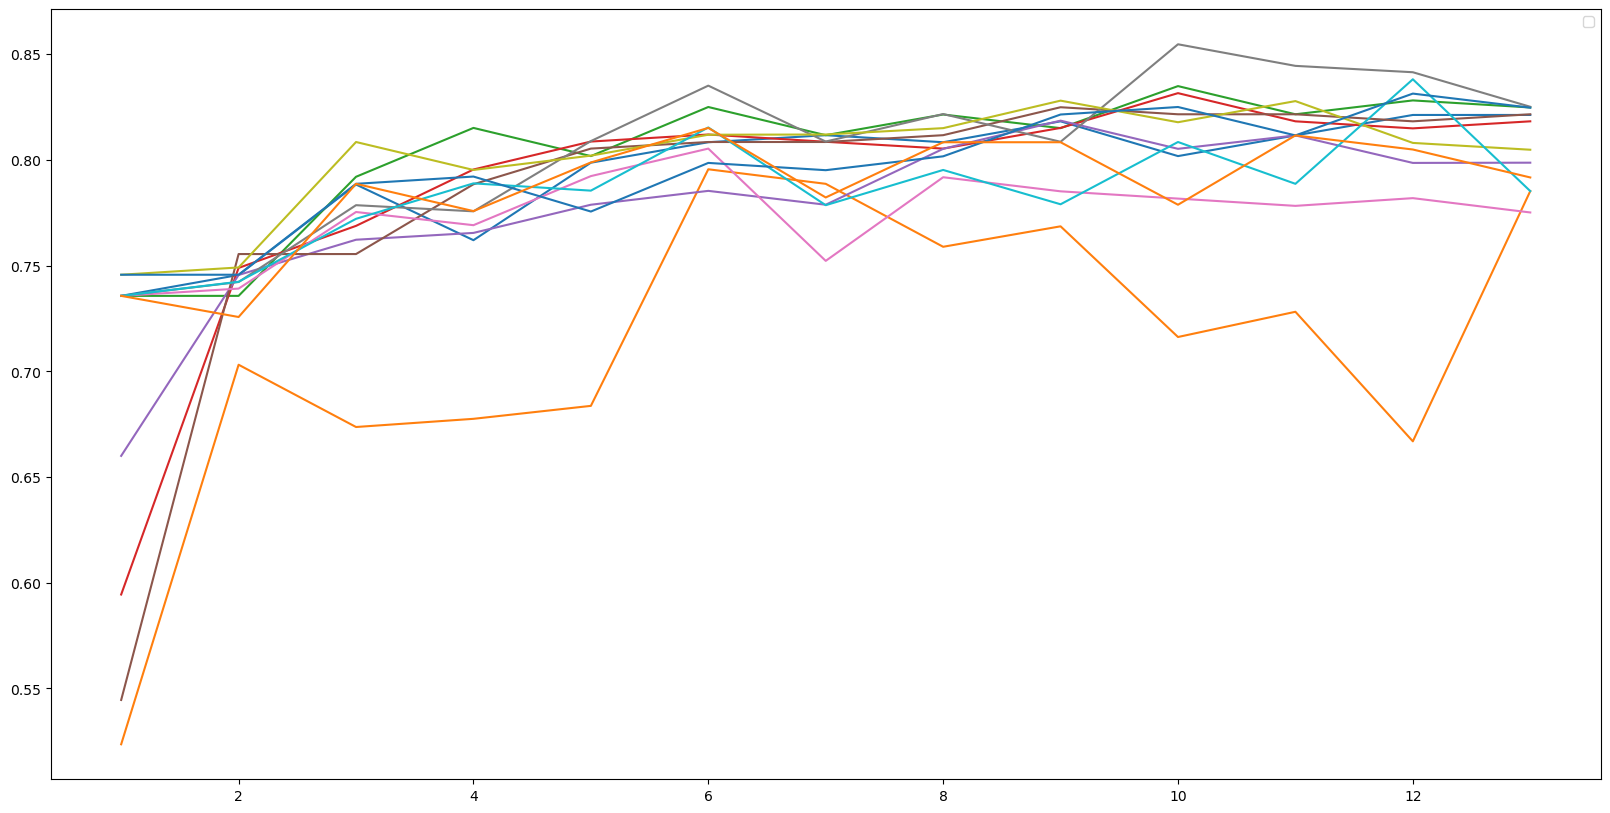

In [80]:
plt.figure(figsize=(20,10))

plt.plot(range(1, len(arr) + 1), arr)
plt.legend()
plt.show()

In [81]:
feature2=SelectKBest(chi2,k=10).fit(X,y)
xxy_train=feature1.transform(X)
feature_dataframe=pd.DataFrame({'Feature':list(X.columns),
                                'Score':feature2.scores_,
                                'Pvalue':feature2.pvalues_
                               })


In [82]:
feature_dataframe.sort_values(by='Score',ascending=False)

,Feature,Score,Pvalue
11,num_major_vessels,66.440765,3.605677e-16
2,chest_pain_type,62.598098,2.534982e-15
9,st_depression,42.573932,6.806041e-11
8,exercise_induced_angina,38.914377,4.428074e-10
7,max_heart_rate_achieved,27.987823,1.220812e-07
10,st_slope,9.804095,1.741237e-03
0,age,8.431915,3.686919e-03
1,sex,7.576835,5.912318e-03
12,thalassemia,5.791853,1.610061e-02
6,resting_electrocardiogram,2.978271,8.438939e-02


In [83]:
acc_kbest=cross_val_score(rfc,xxy_train,y,cv=10,scoring='accuracy')
print(acc_kbest.mean())

0.8444086021505376


In [84]:
xxy_train.shape

(303, 13)

# Feature selection (RFE)

In [85]:
rfe=RFE(rfc,step=1).fit(X,y)
x_train_rfe=rfe.transform(X)


In [86]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
2,chest_pain_type,1
7,max_heart_rate_achieved,1
8,exercise_induced_angina,1
10,st_slope,1
11,num_major_vessels,1
12,thalassemia,1
0,age,2
9,st_depression,3
1,sex,4
6,resting_electrocardiogram,5


In [87]:
acc_rfe=cross_val_score(rfc,x_train_rfe,y,cv=10,scoring='accuracy')
print(acc_rfe.mean())

0.8184946236559141


In [88]:
x_train_rfe.shape

(303, 6)

In [89]:
rfe_col=list(rfe.get_feature_names_out())
rfe_col

['chest_pain_type',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

# Feature selection (RFECV)

In [90]:
rfecv=RFECV( estimator=rfc,
            step=1,
            cv=10,
            scoring='accuracy',
            n_jobs=-1
        ).fit(X,y)


In [91]:
rfecv_data=pd.DataFrame({
                'Feature':X.columns,
                'Ranking':rfecv.ranking_
})
rfecv_data.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
1,sex,1
2,chest_pain_type,1
3,resting_blood_pressure,1
6,resting_electrocardiogram,1
7,max_heart_rate_achieved,1
8,exercise_induced_angina,1
9,st_depression,1
10,st_slope,1
11,num_major_vessels,1


In [92]:
rfecv.get_feature_names_out()

array(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'resting_electrocardiogram', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia'], dtype=object)

In [93]:
trans_x_train=rfecv.transform(X)
acc=cross_val_score(rfc,trans_x_train,y,cv=10,scoring='accuracy')
print(acc.mean())

0.8481720430107526


In [94]:
trans_x_train.shape

(303, 11)

In [95]:
rfecv_col=list(rfecv.get_feature_names_out())
rfecv_col

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'resting_electrocardiogram',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

# Feature selection (FORWARD Technique)

In [96]:
forward=SequentialFeatureSelector(
                                rfc,
                                direction='forward',
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1).fit(X,y)

In [97]:
for_x_train=forward.transform(X)
acc_for=cross_val_score(rfc,for_x_train,y,cv=10,scoring='accuracy')
print(acc_for.mean())

0.8478494623655914


In [98]:
list(forward.get_feature_names_out())

['chest_pain_type',
 'resting_electrocardiogram',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

In [99]:
for_x_train.shape

(303, 6)

# Feature selection (BACKWARD Technique)

In [100]:
backward=SequentialFeatureSelector(
                                rfc,
                                direction='backward',
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1).fit(X,y)

In [101]:
back_x_train=backward.transform(X)
acc_back=cross_val_score(rfc,back_x_train,y,cv=10,scoring='accuracy')
print(acc_back.mean())

0.8512903225806452


In [102]:
back_x_train.shape

(303, 6)

In [103]:
back_col=list(backward.get_feature_names_out())
back_col

['chest_pain_type',
 'resting_blood_pressure',
 'resting_electrocardiogram',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

### we got best accuracy at 6 colums in Backward selection

In [104]:
cc=back_col

In [105]:
cc

['chest_pain_type',
 'resting_blood_pressure',
 'resting_electrocardiogram',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

In [106]:
arr=[]

In [107]:
for i in range(9):
    if i<3:
        traning(x_train_rfe,y)
    elif i<6:
        traning(trans_x_train,y)
    else:
        traning(back_x_train,y)
    

lrg
0.8249462365591398
-----------------------------------------
sgdc
0.7556989247311827
-----------------------------------------
sv
0.8184946236559141
-----------------------------------------
knn
0.8019354838709678
-----------------------------------------
gnb
0.8053763440860215
-----------------------------------------
mnb
0.8084946236559141
-----------------------------------------
dtc
0.792258064516129
-----------------------------------------
rfc
0.8184946236559139
-----------------------------------------
abc
0.8151612903225807
-----------------------------------------
bc
0.8020430107526881
-----------------------------------------
gbc
0.8151612903225807
-----------------------------------------
xgc
0.8251612903225805
-----------------------------------------
lrg
0.8249462365591398
-----------------------------------------
sgdc
0.73247311827957
-----------------------------------------
sv
0.8184946236559141
-----------------------------------------
knn
0.8019354838709678
------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


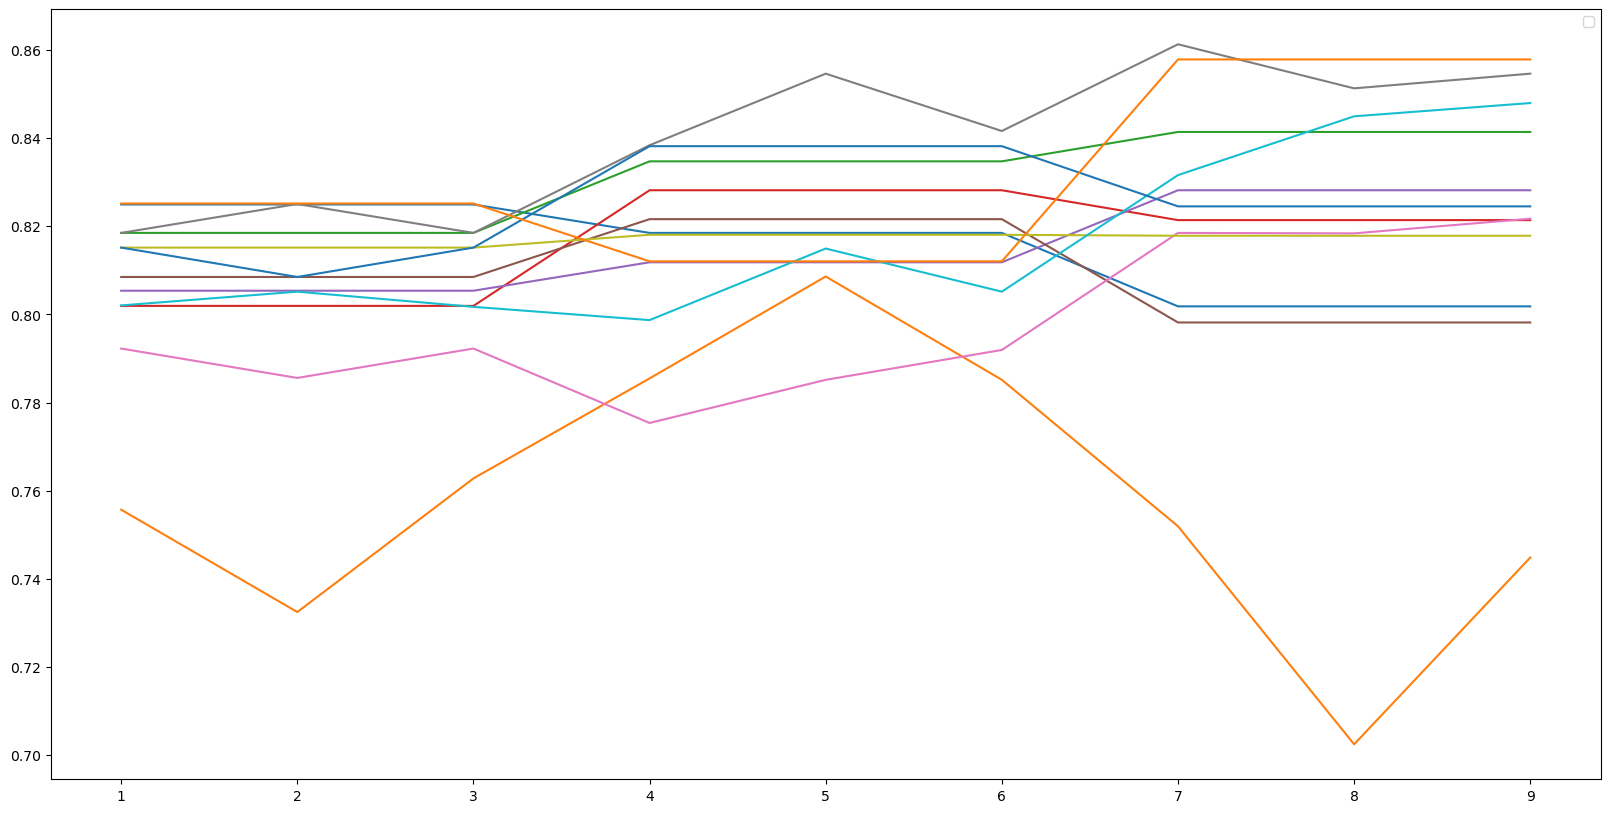

In [111]:
len(arr[0])

12

In [112]:
new=np.array(arr).reshape(9,12)

In [113]:
neww=pd.DataFrame(new,columns=all_model)
neww

,lrg,sgdc,sv,knn,gnb,mnb,dtc,rfc,abc,bc,gbc,xgc
0,0.824946,0.755699,0.818495,0.801935,0.805376,0.808495,0.792258,0.818495,0.815161,0.802043,0.815161,0.825161
1,0.824946,0.732473,0.818495,0.801935,0.805376,0.808495,0.785591,0.825054,0.815161,0.805161,0.808495,0.825161
2,0.824946,0.762796,0.818495,0.801935,0.805376,0.808495,0.792258,0.818495,0.815161,0.801720,0.815161,0.825161
3,0.818495,0.785484,0.834731,0.828172,0.811828,0.821613,0.775376,0.838387,0.818065,0.798710,0.838172,0.812043
4,0.818495,0.808602,0.834731,0.828172,0.811828,0.821613,0.785161,0.854624,0.818065,0.814946,0.838172,0.812043
5,0.818495,0.785161,0.834731,0.828172,0.811828,0.821613,0.791935,0.841613,0.818065,0.805161,0.838172,0.812043
6,0.801828,0.751935,0.841398,0.821398,0.828172,0.798172,0.818495,0.861290,0.817849,0.831613,0.824516,0.857849
7,0.801828,0.702473,0.841398,0.821398,0.828172,0.798172,0.818387,0.851290,0.817849,0.844946,0.824516,0.857849
8,0.801828,0.744839,0.841398,0.821398,0.828172,0.798172,0.821720,0.854624,0.817849,0.847957,0.824516,0.857849


# Plotting all 5 Feature selection technique accuracy

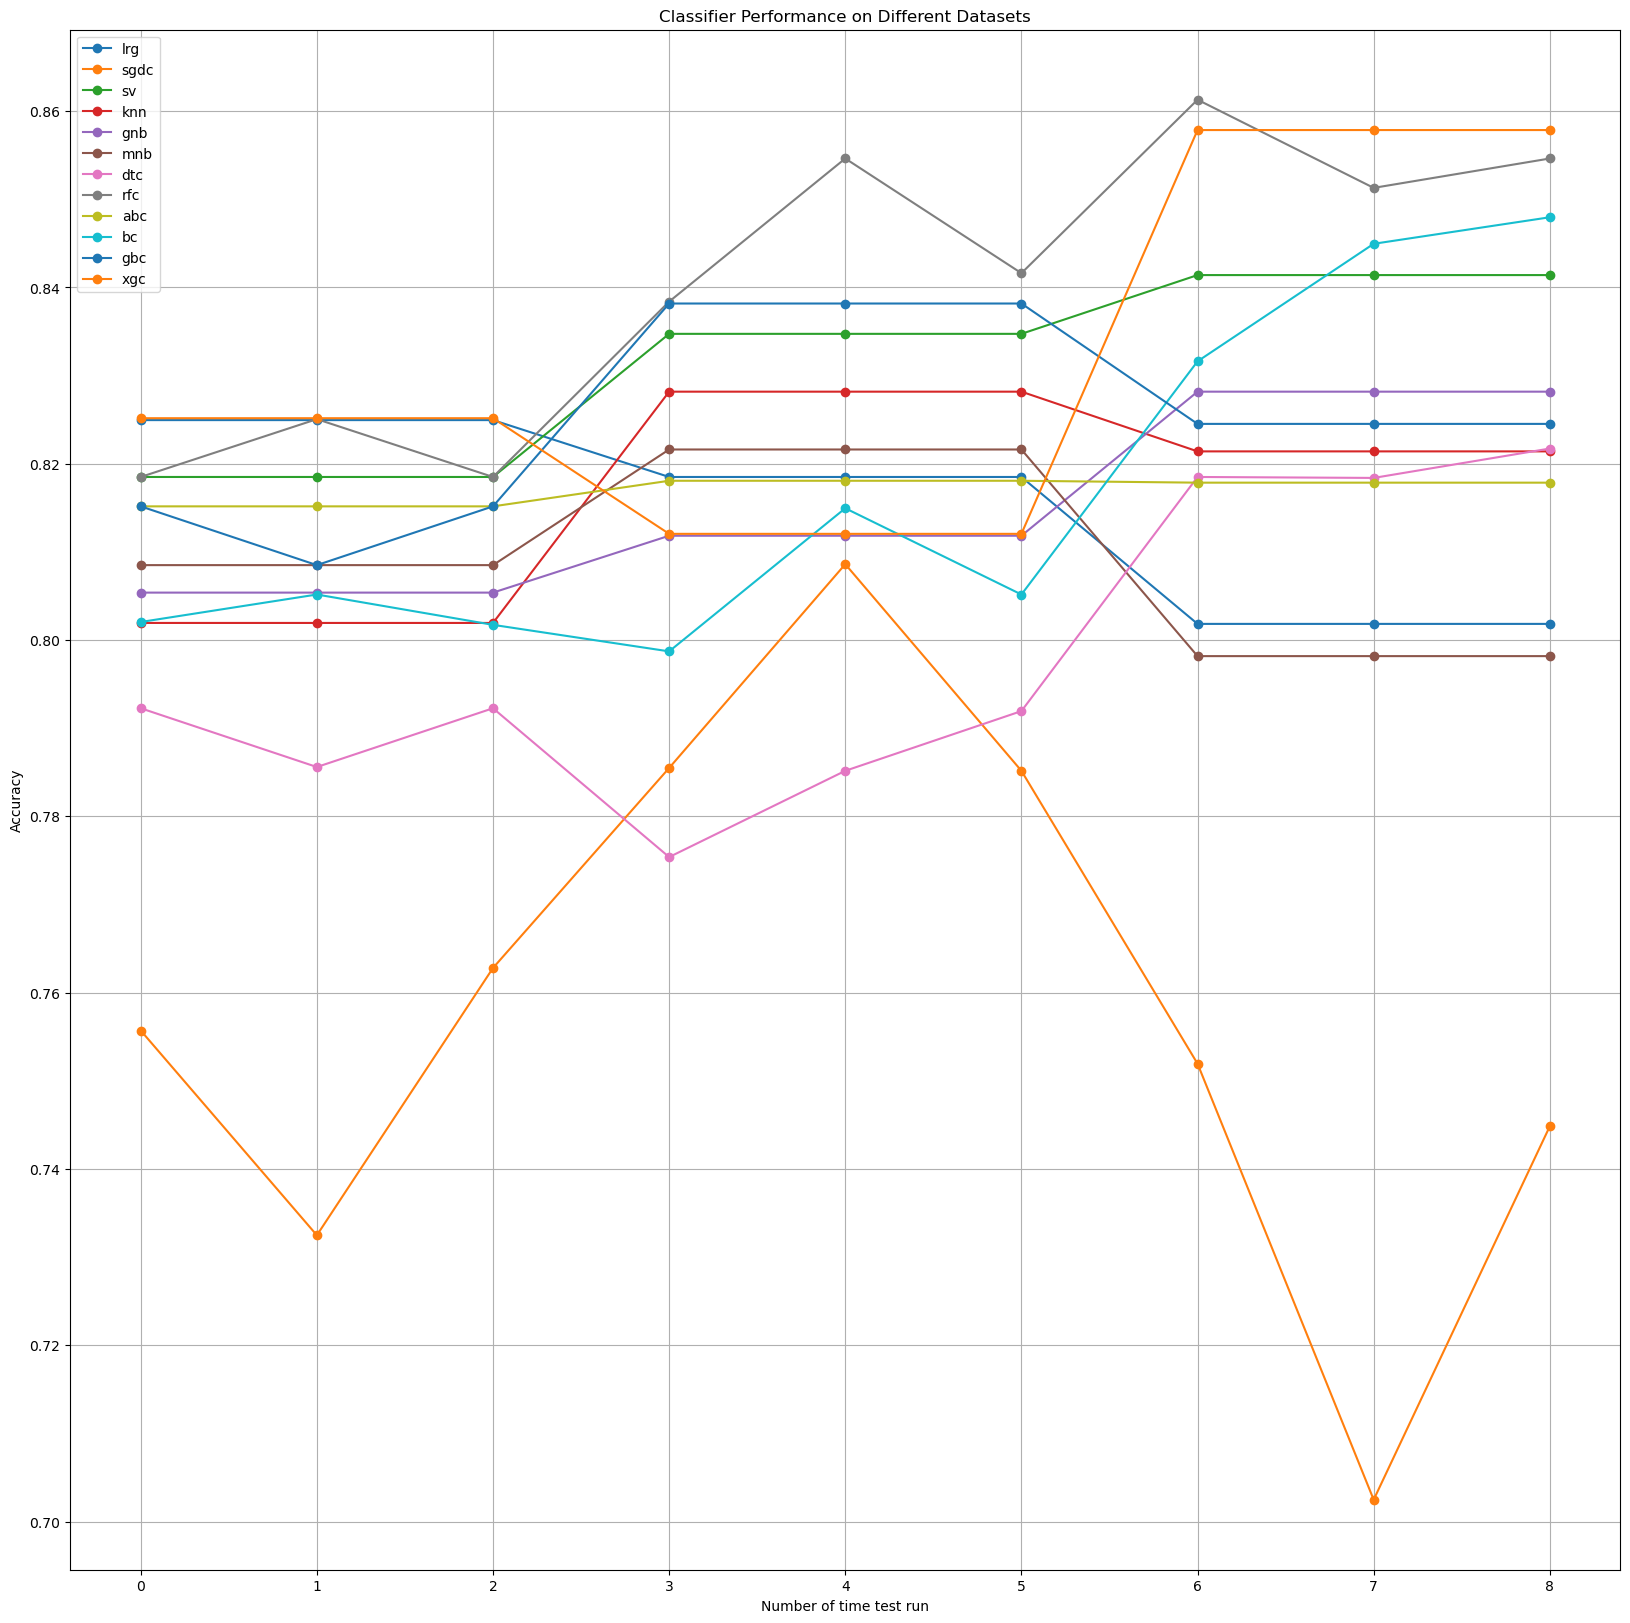

In [114]:

plt.figure(figsize=(20, 20))

# Plot each classifier's performance for each dataset
for classifier in neww.columns:
    plt.plot(neww.index, neww[classifier], marker='o', label=classifier)

# Adding labels and title
plt.xlabel('Number of time test run')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Different Datasets')
plt.xticks(neww.index)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Here we can see Backward feature selection giving the best result
#### Top 6 Algorithom
 - SVM
 - LIGHTGBM
 - Xgboost
 - KNeighborsClassifier
 - RandomForestClassifier
 - GradientBoostingClassifier

In [115]:
models_layer1 = [
    ('rf1', RandomForestClassifier(100)),
    ('gb1', GradientBoostingClassifier()),
    ('sgd1', SGDClassifier()),
    ('knn1', KNeighborsClassifier()),
    ('knn3', KNeighborsClassifier()),
    ('rf4', RandomForestClassifier(100))
]

models_layer2 = [
    ('rf674', RandomForestClassifier(100)),
    ('gb474', GradientBoostingClassifier()),
]
models_layer3 = [
    ('rf', RandomForestClassifier(100)),]

meta =  RandomForestClassifier(100)

In [116]:
scc=StackingClassifier(estimators=models_layer1,
            final_estimator=StackingClassifier(estimators=models_layer2,
                            final_estimator=StackingClassifier(estimators=models_layer3,
                                            final_estimator=meta, cv=5, stack_method='predict'),
                                                       cv=5, stack_method='predict'),
                                                               cv=5, stack_method='predict')

In [117]:
ssc=cross_val_score(scc,back_x_train,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
print(ssc)

### Catboost also giving good accuracy

In [118]:
ssc=cross_val_score(cat,back_x_train,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
print(ssc)

### Creating new DataFrame for new selected Features

# Backward feature selection

In [119]:
new_df=dff.loc[:,back_col].copy(deep=True)

In [120]:
new_df

,chest_pain_type,resting_blood_pressure,resting_electrocardiogram,st_slope,num_major_vessels,thalassemia
0,3,1,0,0,0,1
1,2,2,1,0,0,2
2,1,2,0,2,0,2
3,1,2,1,2,0,2
4,0,2,1,2,0,2
...,...,...,...,...,...,...
298,0,1,1,1,0,3
299,3,2,1,1,0,3
300,0,1,1,1,2,3
301,0,2,1,1,1,3


In [121]:
from sklearn.metrics import classification_report,confusion_matrix
selected_model={
         'sv':sv,
         'knn':knn,
         'rfc':rfc,
         'gbc':gbc,
         'xgc':xgc,
         'lgc':lgc,
         'cat':cat
        }

# Matrice evaluation

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
x_train=backward.transform(x_train)
x_test=backward.transform(x_test)
for key,model in selected_model.items():
    print(f'-------{key}----------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))

-------sv----------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-------knn----------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

-------rfc----------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

-------xgc----------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Hyperparameter Tuning
 - SVM
 - LIGHTGBM
 - Xgboost
 - KNeighborsClassifier
 - RandomForestClassifier
 - GradientBoostingClassifier
 - Catboost

In [123]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [124]:
from sklearn.model_selection import GridSearchCV

# SVM


In [125]:
estimator=sv
param_grid={
            'C':[0,.1,.3,.5,1], 
            'kernel':[ 'poly', 'rbf'], 
            'gamma':['scale','auto',.1,.5,.8], 
            'coef0':[0,.2,.3,.5,.6], 
}
svm_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5
            )

In [126]:
svm_grid.fit(x_train,y_train)

In [127]:
svm_grid.best_estimator_

In [128]:
svm_grid.best_score_

In [129]:
svm_grid.best_params_

# KNeighborsClassifier

In [130]:
estimator=knn
param_grid={
            'n_neighbors':[3,5,8,10], 
            'weights':[ 'uniform', 'distance'], 
            'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 
            'leaf_size':[30,40,50],
            'p':[.5,1,2],
            'metric':['minkowski']            
}
knn_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [131]:
knn_grid.fit(x_train,y_train)

In [132]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)
print(knn_grid.best_params_)

In [133]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

# RandomForestClassifier

In [134]:
estimator=rfc
param_grid={
            'n_estimators':[100,120,140], 
            'criterion':[ 'gini', 'entropy', 'log_loss'], 
            'max_depth':[10,15,None], 
            'max_features':['sqrt', 'log2', None], 
            'bootstrap':[ True,False], 
            'n_jobs':[-1], 
            'random_state':[42,None],
            'ccp_alpha':[0,.1]
}
rfc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [135]:
rfc_grid.fit(x_train,y_train)

In [136]:
print(rfc_grid.best_estimator_)
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

#  GradientBoostingClassifier

In [137]:
estimator=gbc
param_grid={    
            'loss':['log_loss', 'exponential'], 
            'learning_rate':[.1,.2], 
            'n_estimators':[100,200,500,1000], 
            'criterion':['friedman_mse', 'squared_error'],
            'max_depth':[3,4,6],
            'random_state':[42,None],
            'ccp_alpha':[0,.1]
}
gbc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [138]:
gbc_grid.fit(x_train,y_train)

In [139]:
print(gbc_grid.best_estimator_)
print(gbc_grid.best_score_)
print(gbc_grid.best_params_)

# Xgboost

In [140]:
estimator=xgc
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],            # Maximum depth of each tree
    'learning_rate': [0.1, 0.01], # Step size shrinkage
    'gamma': [0, 0.1, 0.2,],   # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.001], # L1 regularization term on weights
    'reg_lambda': [0, 0.001]# L2 regularization term on weights
}
xgc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [141]:
xgc_grid.fit(x_train,y_train)

In [142]:
print(xgc_grid.best_estimator_)
print(xgc_grid.best_score_)
print(xgc_grid.best_params_)

In [143]:
xgc_grid.best_params_

# LIGHTGBM

In [144]:
estimator=lgc
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],       # Gradient Boosting Decision Tree, Dropouts meet Multiple Additive Regression Trees, Gradient-based One-Side Sampling
    'num_leaves': [31, 50],                     # Maximum number of leaves in one tree
    'max_depth': [ 3, 5, 7],                      # Maximum depth of tree, -1 means no limit
    'learning_rate': [0.1, 0.01],             # Step size shrinkage
    'n_estimators': [100, 200, 300],                 # Number of boosting rounds
    'reg_alpha': [0.0, 0.001],                 # L1 regularization term on weights
    'reg_lambda': [0.0, 0.001],                # L2 regularization term on weights
    'random_state': [ 42],                      # Random seed
    'importance_type': ['split', 'gain']             # How the importance is calculated
}

lgc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [145]:
lgc_grid.fit(x_train,y_train)

In [146]:
print(lgc_grid.best_estimator_)
print(lgc_grid.best_score_)
print(lgc_grid.best_params_)

# Catboost

In [147]:
estimator=cat
param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.1, 0.01],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS']
}
cat_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5
            )

In [148]:
cat_grid.fit(x_train,y_train)

In [149]:
print(cat_grid.best_estimator_)
print(cat_grid.best_score_)
print(cat_grid.best_params_)

In [150]:
dict_svm=svm_grid.best_params_
dict_knn=knn_grid.best_params_
dict_rfc=rfc_grid.best_params_
dict_gbc=gbc_grid.best_params_
dict_xgc=xgc_grid.best_params_
dict_lgc=lgc_grid.best_params_
dict_cat=cat_grid.best_params_

In [151]:
dict_cat

# Best parameter for each algo

In [152]:
svc_=SVC(C= 0.3, coef0=0.6, gamma='scale', kernel= 'poly')


knn_=KNeighborsClassifier(algorithm= 'auto',
                             leaf_size= 30,
                             metric= 'minkowski',
                             n_neighbors= 8,
                             p= 1,
                             weights='uniform')


rfc_=RandomForestClassifier(bootstrap= True,
                             ccp_alpha= 0,
                             criterion= 'entropy',
                             max_depth= 15,
                             max_features= 'sqrt',
                             n_estimators= 140,
                             n_jobs= -1,
                             random_state= None)

gbc_=GradientBoostingClassifier(ccp_alpha= 0,
                                 criterion='friedman_mse',
                                 learning_rate= 0.1,
                                 loss= 'exponential',
                                 max_depth= 3,
                                 n_estimators= 100,
                                 random_state= None)

xgc_=xgb.XGBClassifier(gamma= 0.1,
                         learning_rate= 0.1,
                         max_depth= 5,
                         n_estimators= 100,
                         reg_alpha= 0,
                         reg_lambda= 0)


lgc_=lgb.LGBMClassifier(boosting_type= 'gbdt',
                         importance_type= 'split',
                         learning_rate= 0.1,
                         max_depth= 5,
                         n_estimators= 200,
                         num_leaves= 31,
                         random_state= 42,
                         reg_alpha= 0.0,
                         reg_lambda= 0.001)


cat_=cb.CatBoostClassifier(bootstrap_type= 'MVS',
                             depth= 6,
                             grow_policy= 'SymmetricTree',
                             iterations= 100,
                             l2_leaf_reg= 5,
                             learning_rate= 0.1)

In [153]:
models_layer1 = [
    ('rf1', rfc_),
    ('gb1', gbc_),
    ('knn1', knn_),
    ('knn3', knn_),
    ('rf4', rfc_)
]

models_layer2 = [
    ('rf674', rfc_),
    ('gb474', gbc_),
]
models_layer3 = [
    ('rf', rfc_)
]

meta =  rfc_


scc=StackingClassifier(estimators=models_layer1,
            final_estimator=StackingClassifier(estimators=models_layer2,
                            final_estimator=StackingClassifier(estimators=models_layer3,
                                            final_estimator=meta, cv=5, stack_method='predict'),
                                                       cv=5, stack_method='predict'),
                                                               cv=5, stack_method='predict')


ssc=cross_val_score(scc,back_x_train,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
print(ssc)

# Creating Accuracy DF

In [154]:
accuracy_data=pd.DataFrame(columns=['Algorithom','Accuracy'])
algo=[svc_,knn_,rfc_,gbc_,xgc_,lgc_,cat]
x_train,x_test,y_train,y_test=train_test_split(new_df,y,test_size=.2,random_state=42)
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    y_pred=algo[i].predict(x_test)
    accuracy_data.loc[i,'Algorithom']=algo[i]
    accuracy_data.loc[i,'Accuracy']=accuracy_score(y_test,y_pred)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

0:	learn: 0.6882965	total: 161ms	remaining: 2m 40s
1:	learn: 0.6833295	total: 165ms	remaining: 1m 22s
2:	learn: 0.6782376	total: 168ms	remaining: 55.7s
3:	learn: 0.6750275	total: 171ms	remaining: 42.5s
4:	learn: 0.6702332	total: 173ms	remaining: 34.5s
5:	learn: 0.6660179	total: 176ms	remaining: 29.2s
6:	learn: 0.6614907	total: 179ms	remaining: 25.4s
7:	learn: 0.6568403	total: 183ms	remaining: 22.6s
8:	learn: 0.6529018	total: 185ms	remaining: 20.3s
9:	learn: 0.6483712	total: 188ms	remaining: 18.6s
10:	learn: 0.6446423	total: 191ms	remaining: 17.2s
11:	learn: 0.6404434	total: 194ms	remaining: 16s
12:	learn: 0.6366973	total: 197ms	remaining: 15s
13:	learn: 0.6327262	total: 199ms	remaining: 14s
14:	learn: 0.6291382	total: 202ms	remaining: 13.3s
15:	learn: 0.6251158	total: 205ms	remaining: 12.6s
16:	learn: 0.6218400	total: 208ms	remaining: 12s
17:	learn: 0.6195556	total: 211ms	remaining: 11.5s
18:	learn: 0.6152547	total: 213ms	remaining: 11s
19:	learn: 0.6129418	total: 216ms	remaining: 10.6

213:	learn: 0.3380456	total: 543ms	remaining: 2s
214:	learn: 0.3375162	total: 545ms	remaining: 1.99s
215:	learn: 0.3372431	total: 546ms	remaining: 1.98s
216:	learn: 0.3369748	total: 546ms	remaining: 1.97s
217:	learn: 0.3361054	total: 548ms	remaining: 1.96s
218:	learn: 0.3359171	total: 549ms	remaining: 1.96s
219:	learn: 0.3355041	total: 550ms	remaining: 1.95s
220:	learn: 0.3349193	total: 551ms	remaining: 1.94s
221:	learn: 0.3342482	total: 552ms	remaining: 1.93s
222:	learn: 0.3340163	total: 553ms	remaining: 1.93s
223:	learn: 0.3333498	total: 554ms	remaining: 1.92s
224:	learn: 0.3329940	total: 555ms	remaining: 1.91s
225:	learn: 0.3327712	total: 556ms	remaining: 1.9s
226:	learn: 0.3318634	total: 557ms	remaining: 1.9s
227:	learn: 0.3315131	total: 558ms	remaining: 1.89s
228:	learn: 0.3311789	total: 559ms	remaining: 1.88s
229:	learn: 0.3306238	total: 560ms	remaining: 1.88s
230:	learn: 0.3296971	total: 561ms	remaining: 1.87s
231:	learn: 0.3287349	total: 563ms	remaining: 1.86s
232:	learn: 0.328

378:	learn: 0.2800495	total: 725ms	remaining: 1.19s
379:	learn: 0.2797372	total: 727ms	remaining: 1.19s
380:	learn: 0.2795641	total: 729ms	remaining: 1.18s
381:	learn: 0.2791725	total: 730ms	remaining: 1.18s
382:	learn: 0.2789614	total: 730ms	remaining: 1.18s
383:	learn: 0.2786729	total: 732ms	remaining: 1.17s
384:	learn: 0.2782915	total: 732ms	remaining: 1.17s
385:	learn: 0.2782016	total: 733ms	remaining: 1.17s
386:	learn: 0.2776248	total: 734ms	remaining: 1.16s
387:	learn: 0.2773416	total: 735ms	remaining: 1.16s
388:	learn: 0.2772516	total: 736ms	remaining: 1.16s
389:	learn: 0.2771556	total: 737ms	remaining: 1.15s
390:	learn: 0.2769432	total: 739ms	remaining: 1.15s
391:	learn: 0.2767198	total: 741ms	remaining: 1.15s
392:	learn: 0.2765798	total: 742ms	remaining: 1.15s
393:	learn: 0.2762414	total: 743ms	remaining: 1.14s
394:	learn: 0.2757437	total: 744ms	remaining: 1.14s
395:	learn: 0.2756291	total: 744ms	remaining: 1.14s
396:	learn: 0.2753086	total: 745ms	remaining: 1.13s
397:	learn: 

551:	learn: 0.2464059	total: 909ms	remaining: 738ms
552:	learn: 0.2462367	total: 910ms	remaining: 736ms
553:	learn: 0.2461663	total: 911ms	remaining: 734ms
554:	learn: 0.2461280	total: 912ms	remaining: 731ms
555:	learn: 0.2460495	total: 913ms	remaining: 729ms
556:	learn: 0.2459186	total: 914ms	remaining: 727ms
557:	learn: 0.2456768	total: 915ms	remaining: 725ms
558:	learn: 0.2454772	total: 916ms	remaining: 723ms
559:	learn: 0.2452056	total: 917ms	remaining: 721ms
560:	learn: 0.2450603	total: 919ms	remaining: 719ms
561:	learn: 0.2450308	total: 920ms	remaining: 717ms
562:	learn: 0.2448331	total: 921ms	remaining: 715ms
563:	learn: 0.2446517	total: 922ms	remaining: 713ms
564:	learn: 0.2445379	total: 923ms	remaining: 711ms
565:	learn: 0.2442253	total: 924ms	remaining: 709ms
566:	learn: 0.2440214	total: 925ms	remaining: 707ms
567:	learn: 0.2439155	total: 926ms	remaining: 705ms
568:	learn: 0.2438252	total: 927ms	remaining: 702ms
569:	learn: 0.2437453	total: 928ms	remaining: 700ms
570:	learn: 

742:	learn: 0.2253823	total: 1.1s	remaining: 381ms
743:	learn: 0.2253430	total: 1.1s	remaining: 379ms
744:	learn: 0.2252880	total: 1.1s	remaining: 378ms
745:	learn: 0.2252237	total: 1.1s	remaining: 376ms
746:	learn: 0.2251820	total: 1.1s	remaining: 374ms
747:	learn: 0.2251654	total: 1.11s	remaining: 373ms
748:	learn: 0.2251404	total: 1.11s	remaining: 371ms
749:	learn: 0.2250926	total: 1.11s	remaining: 369ms
750:	learn: 0.2249798	total: 1.11s	remaining: 368ms
751:	learn: 0.2249238	total: 1.11s	remaining: 366ms
752:	learn: 0.2249025	total: 1.11s	remaining: 364ms
753:	learn: 0.2248175	total: 1.11s	remaining: 363ms
754:	learn: 0.2247628	total: 1.11s	remaining: 361ms
755:	learn: 0.2247036	total: 1.11s	remaining: 359ms
756:	learn: 0.2246979	total: 1.11s	remaining: 358ms
757:	learn: 0.2246736	total: 1.11s	remaining: 356ms
758:	learn: 0.2245165	total: 1.12s	remaining: 355ms
759:	learn: 0.2244157	total: 1.12s	remaining: 353ms
760:	learn: 0.2243423	total: 1.12s	remaining: 351ms
761:	learn: 0.224

919:	learn: 0.2120439	total: 1.28s	remaining: 112ms
920:	learn: 0.2118731	total: 1.29s	remaining: 110ms
921:	learn: 0.2118631	total: 1.29s	remaining: 109ms
922:	learn: 0.2117839	total: 1.29s	remaining: 107ms
923:	learn: 0.2116602	total: 1.29s	remaining: 106ms
924:	learn: 0.2115851	total: 1.29s	remaining: 105ms
925:	learn: 0.2113617	total: 1.29s	remaining: 103ms
926:	learn: 0.2113472	total: 1.29s	remaining: 102ms
927:	learn: 0.2113083	total: 1.29s	remaining: 100ms
928:	learn: 0.2112424	total: 1.29s	remaining: 98.9ms
929:	learn: 0.2111986	total: 1.29s	remaining: 97.5ms
930:	learn: 0.2109951	total: 1.29s	remaining: 96ms
931:	learn: 0.2109429	total: 1.3s	remaining: 94.7ms
932:	learn: 0.2107779	total: 1.3s	remaining: 93.3ms
933:	learn: 0.2107263	total: 1.3s	remaining: 91.9ms
934:	learn: 0.2105796	total: 1.3s	remaining: 90.4ms
935:	learn: 0.2105383	total: 1.3s	remaining: 89ms
936:	learn: 0.2104976	total: 1.3s	remaining: 87.6ms
937:	learn: 0.2103142	total: 1.3s	remaining: 86.2ms
938:	learn: 0

In [155]:
model_name=['SVC','KNeighbors','RandomForest','GradientBoosting',
           'XGB','LightBoost','CatBoost']
for i in range(len(model_name)):
    accuracy_data.loc[i,'Algorithom']=model_name[i]


In [156]:
accuracy_data

,Algorithom,Accuracy
0,SVC,0.885246
1,KNeighbors,0.885246
2,RandomForest,0.868852
3,GradientBoosting,0.885246
4,XGB,0.885246
5,LightBoost,0.836066
6,CatBoost,0.852459


# Comparison of different models

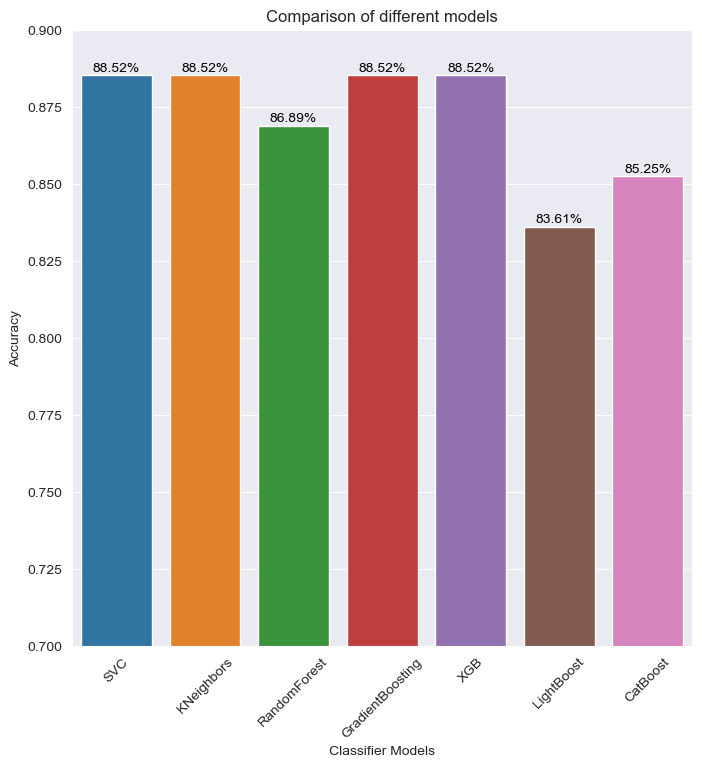

In [157]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax = sns.barplot(x=accuracy_data['Algorithom'], y=accuracy_data['Accuracy'])

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')
plt.xticks(rotation=45)
plt.ylim(.7,.9)
plt.show()

# confusion matrix for all Algorithm

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


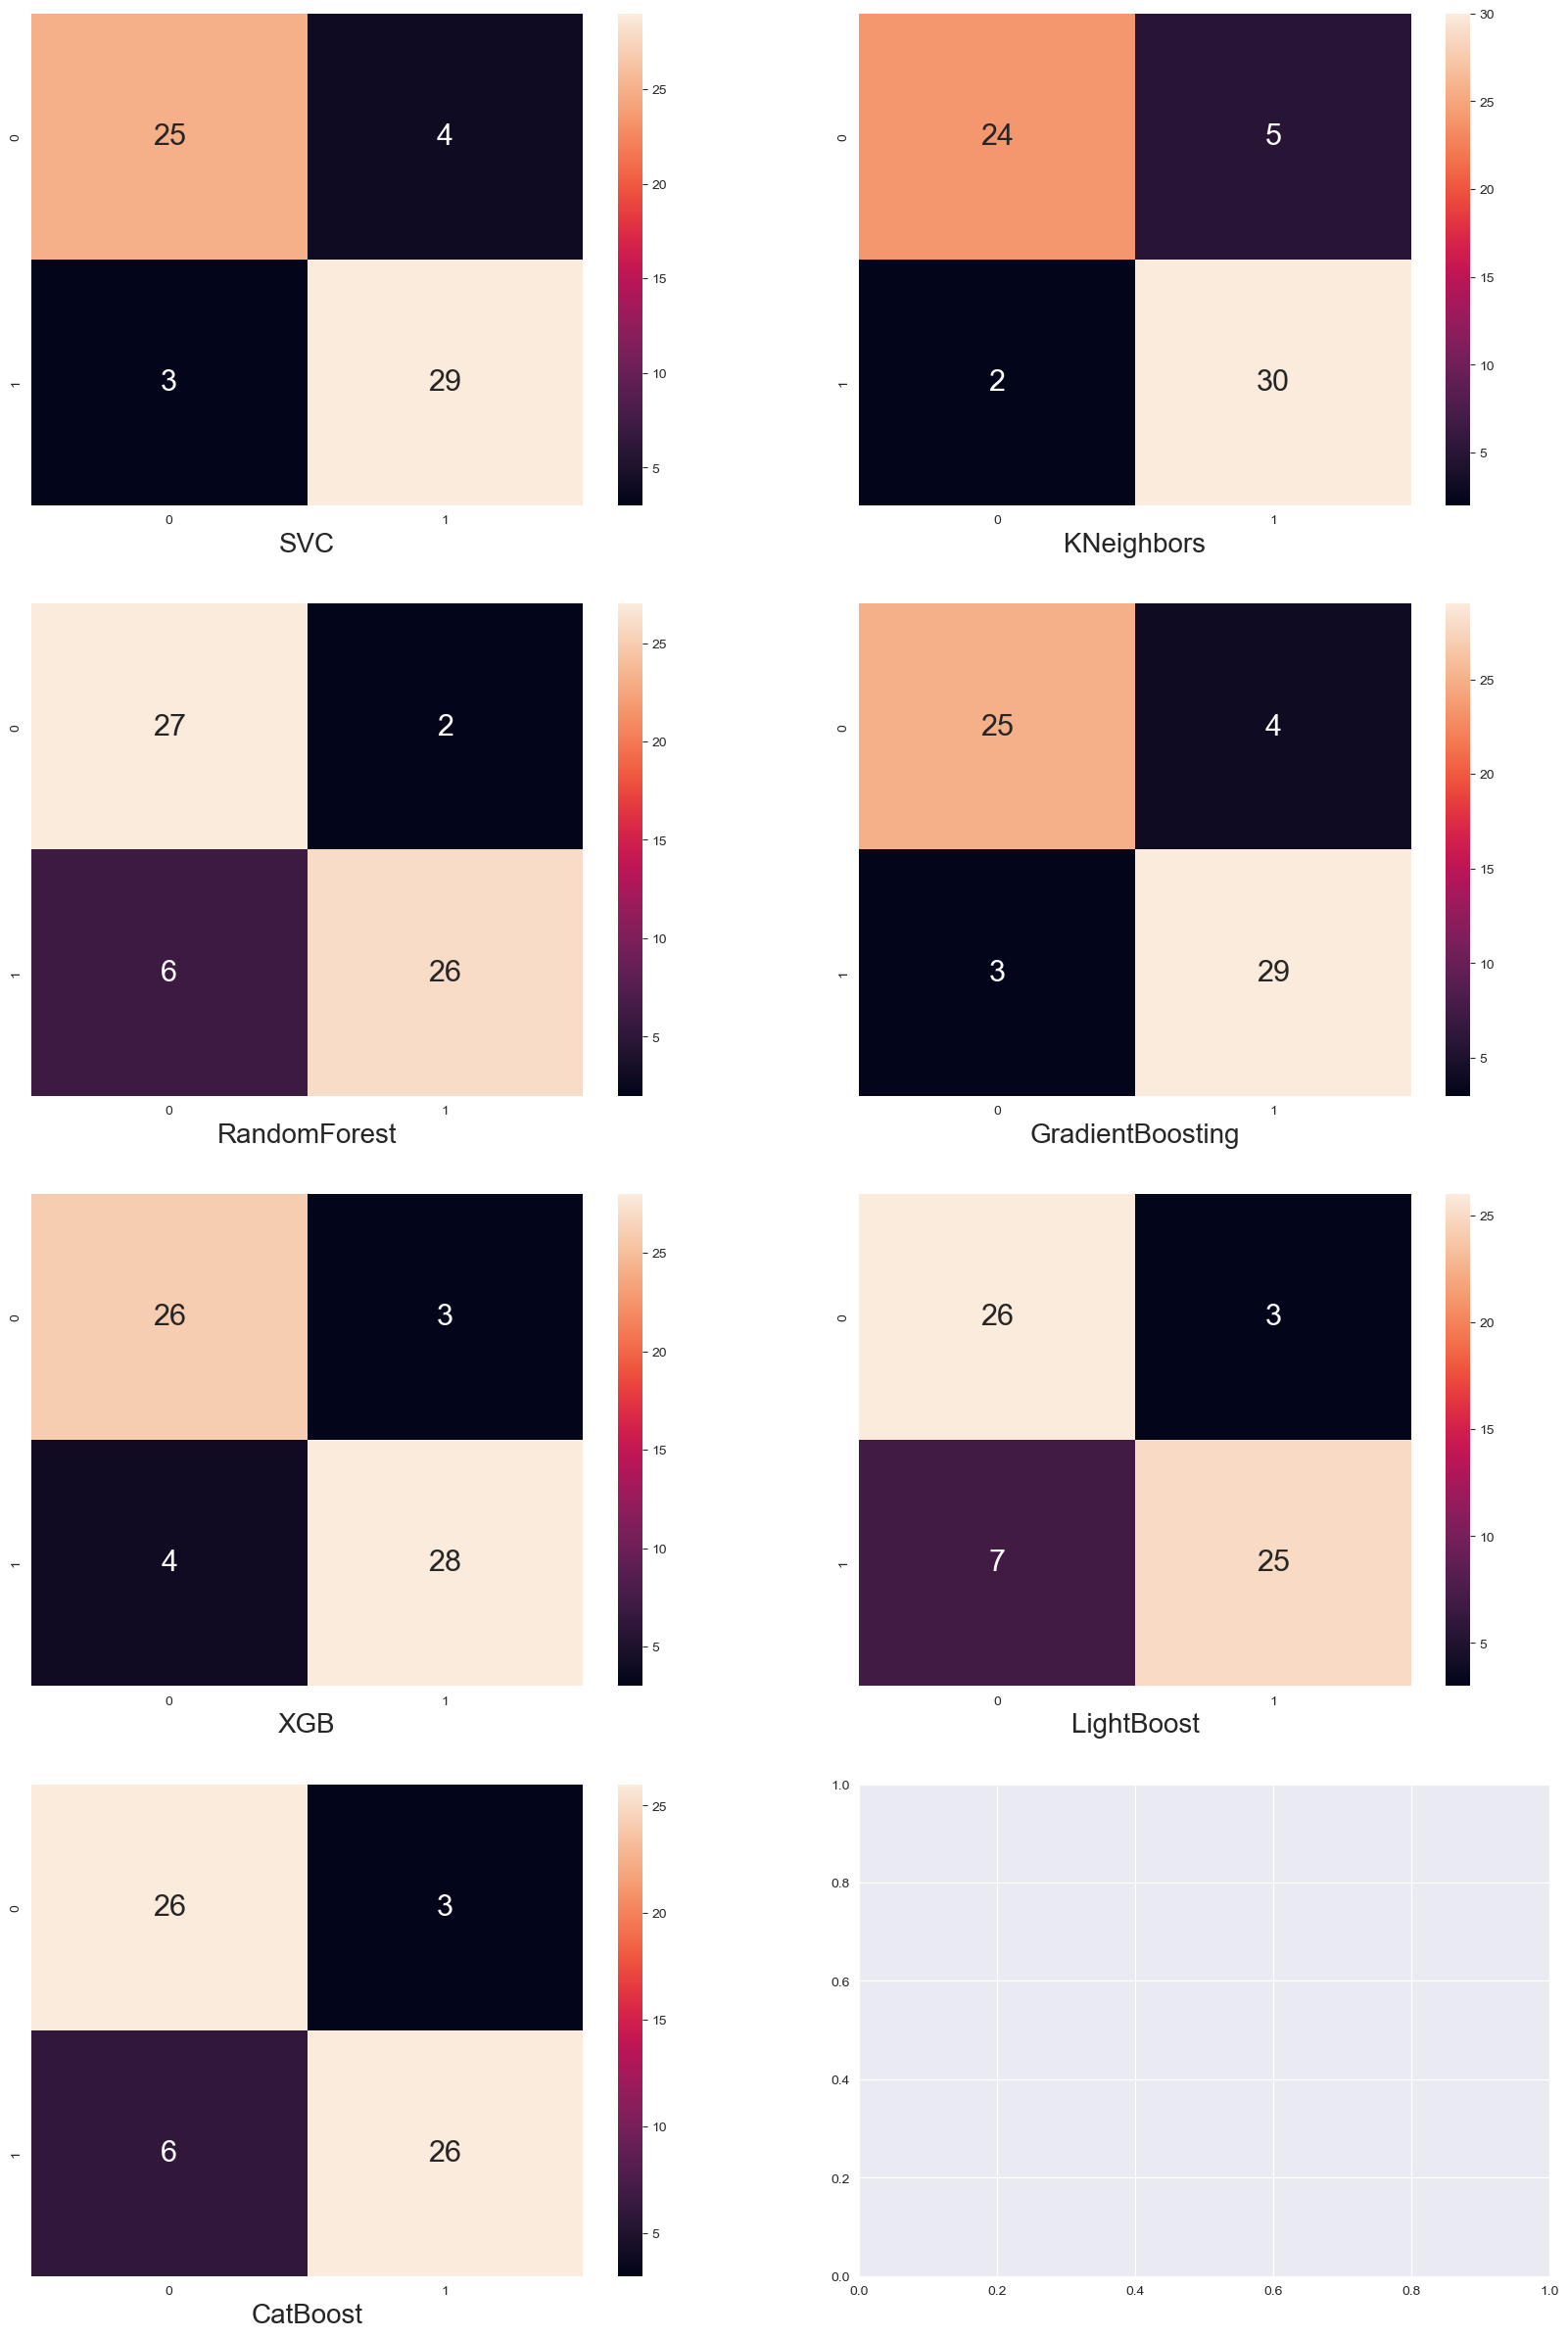

In [158]:
fig,ax= plt.subplots(4,2,figsize=(20,30))
for i in range(accuracy_data.shape[0]):
    row,col=i//2,i%2
    sns.heatmap(confusion_matrix(y_test,algo[i].predict(x_test)),annot=True,annot_kws={"fontsize": 22}
                ,ax=ax[row,col])
    ax[row,col].set_xlabel(model_name[i],fontsize=20)

In [160]:
import pickle
pickle.dump(xgc_,open('heart_disease_xgb.pkl','wb'))